# Patient Treatment in Emergency Department

Marta Stefanelli - 84393A

In [2]:
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

In [3]:
log = pd.read_csv('dataset_for_exam.csv')
log.rename(columns={'stay_id': 'case:concept:name',
                    'time': 'time:timestamp',
                    'activity': 'concept:name'}, inplace=True)

log['time:timestamp'] = pd.to_datetime(log['time:timestamp'])
log['case:concept:name'] = log['case:concept:name'].astype(str)

log

,case:concept:name,time:timestamp,concept:name,gender,race,arrival_transport,disposition,diagnosis_sequence,diagnosis_code,diagnosis_description,...,acuity,chiefcomplaint,rhythm,drug_name,generic_drug_code,national_drug_code,reconciliation_nurse_id,drug_class_code,drug_class_classification,administering_nurse_id
0,30005370,2110-06-25 05:10:00,Enter the ED,F,WHITE,AMBULANCE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30005370,2110-06-25 05:10:01,Triage in the ED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,SBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30005370,2110-06-25 05:28:00,Medicine reconciliation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ondansetron HCl [Zofran],16392.0,1.659005e+10,1.0,457.0,Antiemetic - Selective Serotonin 5-HT3 Antagon...,NaN
3,30005370,2110-06-25 05:28:00,Medicine reconciliation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,omeprazole [Prilosec],43137.0,1.671407e+10,1.0,445.0,Gastric Acid Secretion Reducing Agents - Proto...,NaN
4,30005370,2110-06-25 05:28:00,Medicine reconciliation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,acetaminophen [Acetaminophen Extra Strength],4490.0,1.000301e+10,1.0,577.0,Analgesic or Antipyretic Non-Opioid,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25110,39999292,2110-08-15 00:48:00,Vital sign check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25111,39999292,2110-08-15 00:48:01,Triage in the ED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,Cough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25112,39999292,2110-08-15 01:23:00,Medicine reconciliation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Prozac,46213.0,1.054406e+10,1.0,530.0,Antidepressant - Selective Serotonin Reuptake ...,NaN
25113,39999292,2110-08-15 02:57:00,Vital sign check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtering 


In [4]:
num_events = len(log)
num_cases = len(log['case:concept:name'].unique())
print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

start_activities = pm4py.get_start_activities(log)
end_activities = pm4py.get_end_activities(log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Number of events: 25115
Number of cases: 1820
Start activities: {'Enter the ED': 1820}
End activities: {'Discharge from the ED': 1820}


The fact that all the cases start and end with the same activity it means that the variation, if any, occurs inside the process and the log is well formed.

In [5]:
# Null duration filter
filtered_log = pm4py.filter_case_performance(log, 0, 0)

print("Given {} total cases in the log we have {} cases that comply with the applied filter".format(len(log['case:concept:name'].unique()), len(filtered_log['case:concept:name'].unique())))

Given 1820 total cases in the log we have 0 cases that comply with the applied filter


Applying this type of filtering I found out that there isn't activity with a null duration, this is another good information.

In [6]:
# Count of complete duplicates
duplicate_mask_full = log.duplicated(keep=False)
num_duplicates_full = duplicate_mask_full.sum()
num_cases_with_duplicates_full = log.loc[duplicate_mask_full, 'case:concept:name'].nunique()

print(f"Total number of duplicate rows (all columns identical): {num_duplicates_full}")
print(f"Number of patients with at least one complete duplicate: {num_cases_with_duplicates_full}")

# Some examples of complete duplicate rows
print("\nExamples of complete duplicate rows:")
print(log.loc[duplicate_mask_full].sort_values(['case:concept:name', 'time:timestamp']).head(10))


Total number of duplicate rows (all columns identical): 0
Number of patients with at least one complete duplicate: 0

Examples of complete duplicate rows:
Empty DataFrame
Columns: [case:concept:name, time:timestamp, concept:name, gender, race, arrival_transport, disposition, diagnosis_sequence, diagnosis_code, diagnosis_description, temperature, heartrate, resprate, o2sat, sbp, dbp, pain, acuity, chiefcomplaint, rhythm, drug_name, generic_drug_code, national_drug_code, reconciliation_nurse_id, drug_class_code, drug_class_classification, administering_nurse_id]
Index: []

[0 rows x 27 columns]


In [7]:
# Verify empty columns
empty_columns = log.columns[log.isna().all()]

if len(empty_columns) > 0:
    print("Empty columns:")
    for col in empty_columns:
        print(f"- {col}")
else:
    print("No empty columns.")

No empty columns.


In [8]:
# Sort the log by case and timestamp
# useful for chronological analysis
log = log.sort_values(by=['case:concept:name', 'time:timestamp'])

print(log.head(10))

  case:concept:name      time:timestamp             concept:name gender  \
0          30005370 2110-06-25 05:10:00             Enter the ED      F   
1          30005370 2110-06-25 05:10:01         Triage in the ED    NaN   
2          30005370 2110-06-25 05:28:00  Medicine reconciliation    NaN   
3          30005370 2110-06-25 05:28:00  Medicine reconciliation    NaN   
4          30005370 2110-06-25 05:28:00  Medicine reconciliation    NaN   
5          30005370 2110-06-25 05:28:00  Medicine reconciliation    NaN   
6          30005370 2110-06-25 05:28:00  Medicine reconciliation    NaN   
7          30005370 2110-06-25 05:28:00  Medicine reconciliation    NaN   
8          30005370 2110-06-25 05:28:00  Medicine reconciliation    NaN   
9          30005370 2110-06-25 05:28:00  Medicine reconciliation    NaN   

    race arrival_transport disposition  diagnosis_sequence diagnosis_code  \
0  WHITE         AMBULANCE         NaN                 NaN            NaN   
1    NaN            

In [11]:
# columns to check
numeric_cols = ['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain', 'acuity']

# conversion with coercion to NaN for non-numeric values
for col in numeric_cols:
    log[col] = pd.to_numeric(log[col], errors='coerce')

# Separate masks for impossible/extreme values (only if not NaN)
temp_extreme = log['temperature'].notna() & ((log['temperature'] < 95) | (log['temperature'] > 110))
hr_extreme = log['heartrate'].notna() & ((log['heartrate'] < 30) | (log['heartrate'] > 220))
resp_extreme = log['resprate'].notna() & ((log['resprate'] < 5) | (log['resprate'] > 60))
o2_extreme = log['o2sat'].notna() & ((log['o2sat'] < 50) | (log['o2sat'] > 100))
sbp_extreme = log['sbp'].notna() & ((log['sbp'] < 50) | (log['sbp'] > 250))
dbp_extreme = log['dbp'].notna() & ((log['dbp'] < 30) | (log['dbp'] > 150))
pain_extreme = log['pain'].notna() & ((log['pain'] < 0) | (log['pain'] > 10))
acuity_extreme = log['acuity'].notna() & ((log['acuity'] < 1) | (log['acuity'] > 5))

# Combination of all extreme masks
extreme_mask = (
    temp_extreme | hr_extreme | resp_extreme | o2_extreme |
    sbp_extreme | dbp_extreme | pain_extreme | acuity_extreme
)

# Select extreme events only 
extreme_events = log[extreme_mask]

print(f"Total number of events: {len(log)}")
print(f"Number of events with impossible values: {len(extreme_events)}")
print(f"Percentage of events with impossible values: {len(extreme_events)/len(log)*100:.2f}%")

num_patients_extreme = extreme_events['case:concept:name'].nunique()
print(f"Number of patients with at least one impossible event: {num_patients_extreme}")
print(f"Percentage of patients with impossible events: {num_patients_extreme/len(log['case:concept:name'].unique())*100:.2f}%")

print("\nExamples of events with impossible values:")
print(extreme_events.head(10))

# First extreme event
first_extreme_event = extreme_events.iloc[0]


Total number of events: 25115
Number of events with impossible values: 99
Percentage of events with impossible values: 0.39%
Number of patients with at least one impossible event: 78
Percentage of patients with impossible events: 4.29%

Examples of events with impossible values:
     case:concept:name      time:timestamp      concept:name gender race  \
175           30065258 2110-03-01 21:21:00  Vital sign check    NaN  NaN   
233           30073465 2110-07-31 15:41:01  Triage in the ED    NaN  NaN   
557           30179630 2110-12-16 15:00:01  Triage in the ED    NaN  NaN   
760           30240219 2110-12-03 00:27:01  Triage in the ED    NaN  NaN   
821           30282085 2110-08-16 14:04:00  Vital sign check    NaN  NaN   
834           30288726 2110-06-10 17:27:01  Triage in the ED    NaN  NaN   
1846          30686376 2110-06-21 11:00:00  Vital sign check    NaN  NaN   
2849          31033313 2110-01-15 10:45:01  Triage in the ED    NaN  NaN   
3116          31099185 2110-12-16 09

In [12]:
# List to store reasons for extremeness
extreme_reasons = []

# Check each numeric field for extremeness
if pd.notna(first_extreme_event['temperature']) and (first_extreme_event['temperature'] < 95 or first_extreme_event['temperature'] > 110):
    extreme_reasons.append(f"temperature = {first_extreme_event['temperature']}")

if pd.notna(first_extreme_event['heartrate']) and (first_extreme_event['heartrate'] < 30 or first_extreme_event['heartrate'] > 220):
    extreme_reasons.append(f"heartrate = {first_extreme_event['heartrate']}")

if pd.notna(first_extreme_event['resprate']) and (first_extreme_event['resprate'] < 5 or first_extreme_event['resprate'] > 60):
    extreme_reasons.append(f"resprate = {first_extreme_event['resprate']}")

if pd.notna(first_extreme_event['o2sat']) and (first_extreme_event['o2sat'] < 50 or first_extreme_event['o2sat'] > 100):
    extreme_reasons.append(f"o2sat = {first_extreme_event['o2sat']}")

if pd.notna(first_extreme_event['sbp']) and (first_extreme_event['sbp'] < 50 or first_extreme_event['sbp'] > 250):
    extreme_reasons.append(f"sbp = {first_extreme_event['sbp']}")

if pd.notna(first_extreme_event['dbp']) and (first_extreme_event['dbp'] < 30 or first_extreme_event['dbp'] > 150):
    extreme_reasons.append(f"dbp = {first_extreme_event['dbp']}")

if pd.notna(first_extreme_event['pain']) and (first_extreme_event['pain'] < 0 or first_extreme_event['pain'] > 10):
    extreme_reasons.append(f"pain = {first_extreme_event['pain']}")

if pd.notna(first_extreme_event['acuity']) and (first_extreme_event['acuity'] < 1 or first_extreme_event['acuity'] > 5):
    extreme_reasons.append(f"acuity = {first_extreme_event['acuity']}")

# First extreme event details
print("\nFirst extreme event:")
print(first_extreme_event.to_string())

print("\nValues considered extreme in this event:")
for reason in extreme_reasons:
    print("-", reason)


First extreme event:
case:concept:name                       30065258
time:timestamp               2110-03-01 21:21:00
concept:name                    Vital sign check
gender                                       NaN
race                                         NaN
arrival_transport                            NaN
disposition                                  NaN
diagnosis_sequence                           NaN
diagnosis_code                               NaN
diagnosis_description                        NaN
temperature                                  NaN
heartrate                                   86.0
resprate                                    18.0
o2sat                                       97.0
sbp                                         20.0
dbp                                         68.0
pain                                         0.0
acuity                                       NaN
chiefcomplaint                               NaN
rhythm                                       Na

In [13]:
# Patients with at least one extreme event

# Total number of patients in the log
total_patients = log['case:concept:name'].nunique()
print("Total number of patients (cases):", total_patients)

# Total of unique patients with extreme events
patients_with_extreme = extreme_events['case:concept:name'].unique()
print("Number of patients (cases) with impossible values:", len(patients_with_extreme))

print(f"Total number of events in the log: {len(log)}")

# Creating a clean log without patients with extreme values
clean_log = log[~log['case:concept:name'].isin(patients_with_extreme)].copy()

# Statistics on the clean log
num_events_clean = len(clean_log)
num_cases_clean = clean_log['case:concept:name'].nunique()

print(f"Number of events after removing patients with impossible values: {num_events_clean}")
print(f"Number of patients after removing patients with impossible values: {num_cases_clean}")


Total number of patients (cases): 1820
Number of patients (cases) with impossible values: 78
Total number of events in the log: 25115
Number of events after removing patients with impossible values: 23773
Number of patients after removing patients with impossible values: 1742


# analysis

In [14]:
# TEMPORAL METRICS FOR SINGLE-TIMESTAMP EVENT LOGS
# action time (AT), LT, TT, incremental LT

print("VALID TEMPORAL METRICS FOR THIS DATASET")

# Ensure chronological order by case
clean_log = clean_log.sort_values(by=['case:concept:name', 'time:timestamp'])


# ACTION TIME (AT): time between consecutive events
clean_log['next_timestamp'] = clean_log.groupby('case:concept:name')['time:timestamp'].shift(-1)

# convert to datetime the column next_timestamp
clean_log['next_timestamp'] = pd.to_datetime(clean_log['next_timestamp'])


clean_log['action_time_minutes'] = (
    (clean_log['next_timestamp'] - clean_log['time:timestamp']).dt.total_seconds() / 60.0
)

# Last event => action time = 0
clean_log['action_time_minutes'] = clean_log['action_time_minutes'].fillna(0)

# First event => action time = 0
first_event_mask = clean_log.groupby('case:concept:name').cumcount() == 0
clean_log.loc[first_event_mask, 'action_time_minutes'] = 0



# LEAD TIME (LT): first to last event per case
case_LT = clean_log.groupby('case:concept:name')['time:timestamp'].agg(['min', 'max'])
case_LT['LT_minutes'] = (case_LT['max'] - case_LT['min']).dt.total_seconds() / 60.0

clean_log = clean_log.merge(
    case_LT[['LT_minutes']],
    left_on='case:concept:name',
    right_index=True,
    how='left'
)

# INCREMENTAL LEAD TIME (ILT)
clean_log = clean_log.sort_values(by=['case:concept:name', 'time:timestamp'])
clean_log['first_timestamp'] = clean_log.groupby('case:concept:name')['time:timestamp'].transform('min')
clean_log['incremental_LT_minutes'] = (
    (clean_log['time:timestamp'] - clean_log['first_timestamp'])
    .dt.total_seconds() / 60.0
)


# SUMMARY
case_summary = pd.concat([case_LT['LT_minutes']], axis=1)

print("=== CASE-LEVEL TEMPORAL METRICS ===")
print(case_summary.head())

print("\nSummary statistics (minutes):")
print(case_summary[['LT_minutes']].describe())


print("\n=== EVENT-LEVEL SAMPLE (first 10 rows) ===")
print(clean_log[['case:concept:name',
                 'concept:name',
                 'time:timestamp',
                 'action_time_minutes',
                 'LT_minutes',
                 'incremental_LT_minutes']].head(10))


# PRINT Incremental Lead Time per event
print("\n=== Incremental Lead Time (ILT) per Event ===")
print(clean_log[['case:concept:name',
                 'concept:name',
                 'time:timestamp',
                 'incremental_LT_minutes']].head(20)) 



VALID TEMPORAL METRICS FOR THIS DATASET
=== CASE-LEVEL TEMPORAL METRICS ===
                   LT_minutes
case:concept:name            
30005370           272.000000
30011087           138.933333
30016618           345.000000
30022872           460.000000
30023012           346.000000

Summary statistics (minutes):
        LT_minutes
count  1742.000000
mean    408.798546
std     428.309789
min       4.000000
25%     194.000000
50%     300.000000
75%     457.816667
max    5065.000000

=== EVENT-LEVEL SAMPLE (first 10 rows) ===
  case:concept:name             concept:name      time:timestamp  \
0          30005370             Enter the ED 2110-06-25 05:10:00   
1          30005370         Triage in the ED 2110-06-25 05:10:01   
2          30005370  Medicine reconciliation 2110-06-25 05:28:00   
3          30005370  Medicine reconciliation 2110-06-25 05:28:00   
4          30005370  Medicine reconciliation 2110-06-25 05:28:00   
5          30005370  Medicine reconciliation 2110-06-25 05:2

In [15]:
# columns in the cleaned log
print("Columns in the cleaned log:")
print(clean_log.columns.tolist())


Columns in the cleaned log:
['case:concept:name', 'time:timestamp', 'concept:name', 'gender', 'race', 'arrival_transport', 'disposition', 'diagnosis_sequence', 'diagnosis_code', 'diagnosis_description', 'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain', 'acuity', 'chiefcomplaint', 'rhythm', 'drug_name', 'generic_drug_code', 'national_drug_code', 'reconciliation_nurse_id', 'drug_class_code', 'drug_class_classification', 'administering_nurse_id', 'next_timestamp', 'action_time_minutes', 'LT_minutes', 'first_timestamp', 'incremental_LT_minutes']


In [16]:
import IPython.display as display

# selected columns for the table
table_df = clean_log[
    [
        'case:concept:name',
        'time:timestamp',
        'concept:name',
        'next_timestamp',
        'action_time_minutes',
        'LT_minutes',
        'incremental_LT_minutes'
    ]
]


display.display(table_df.head(23))



,case:concept:name,time:timestamp,concept:name,next_timestamp,action_time_minutes,LT_minutes,incremental_LT_minutes
0,30005370,2110-06-25 05:10:00,Enter the ED,2110-06-25 05:10:01,0.000000,272.000000,0.000000
1,30005370,2110-06-25 05:10:01,Triage in the ED,2110-06-25 05:28:00,17.983333,272.000000,0.016667
2,30005370,2110-06-25 05:28:00,Medicine reconciliation,2110-06-25 05:28:00,0.000000,272.000000,18.000000
3,30005370,2110-06-25 05:28:00,Medicine reconciliation,2110-06-25 05:28:00,0.000000,272.000000,18.000000
4,30005370,2110-06-25 05:28:00,Medicine reconciliation,2110-06-25 05:28:00,0.000000,272.000000,18.000000
5,30005370,2110-06-25 05:28:00,Medicine reconciliation,2110-06-25 05:28:00,0.000000,272.000000,18.000000
6,30005370,2110-06-25 05:28:00,Medicine reconciliation,2110-06-25 05:28:00,0.000000,272.000000,18.000000
7,30005370,2110-06-25 05:28:00,Medicine reconciliation,2110-06-25 05:28:00,0.000000,272.000000,18.000000
8,30005370,2110-06-25 05:28:00,Medicine reconciliation,2110-06-25 05:28:00,0.000000,272.000000,18.000000
9,30005370,2110-06-25 05:28:00,Medicine reconciliation,2110-06-25 05:28:00,0.000000,272.000000,18.000000


=== Activity Action Time Summary ===
                         count       mean     median        std       min  \
concept:name                                                                
Medicine reconciliation   5708  12.050383   0.000000  37.581797  0.000000   
Vital sign check          5587  68.273203  40.000000  83.116750  0.016667   
Medicine dispensations    5536  28.296131   2.000000  54.638408  0.000000   
Discharge from the ED     3458   0.000000   0.000000   0.000000  0.000000   
Enter the ED              1742   0.000000   0.000000   0.000000  0.000000   
Triage in the ED          1742  60.407931  23.983333  83.167024  0.983333   

                                max  
concept:name                         
Medicine reconciliation  465.000000  
Vital sign check         903.000000  
Medicine dispensations   571.000000  
Discharge from the ED      0.000000  
Enter the ED               0.000000  
Triage in the ED         582.983333  


/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/1157157109.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


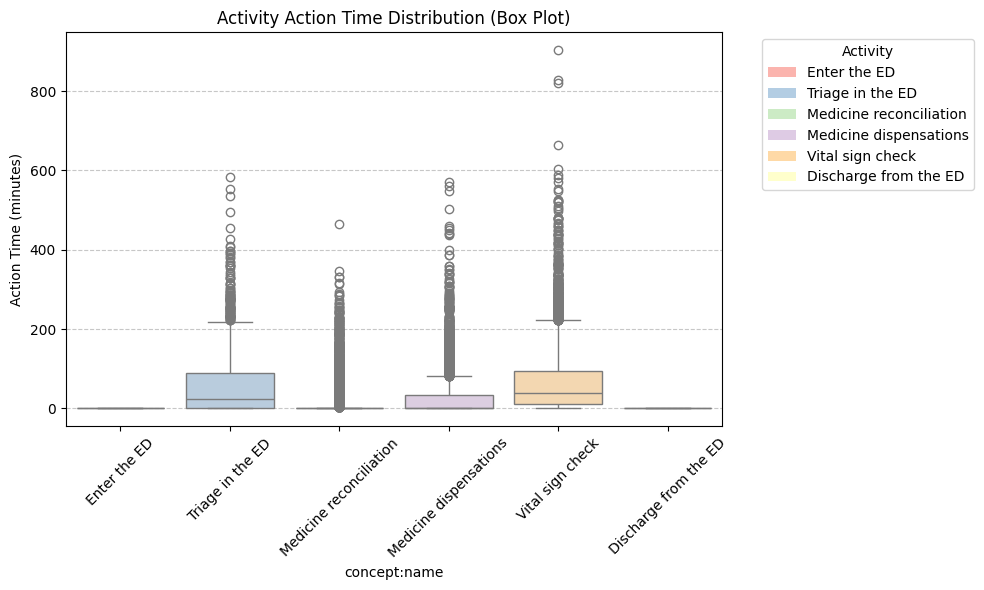

/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/1157157109.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/1157157109.py:49: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


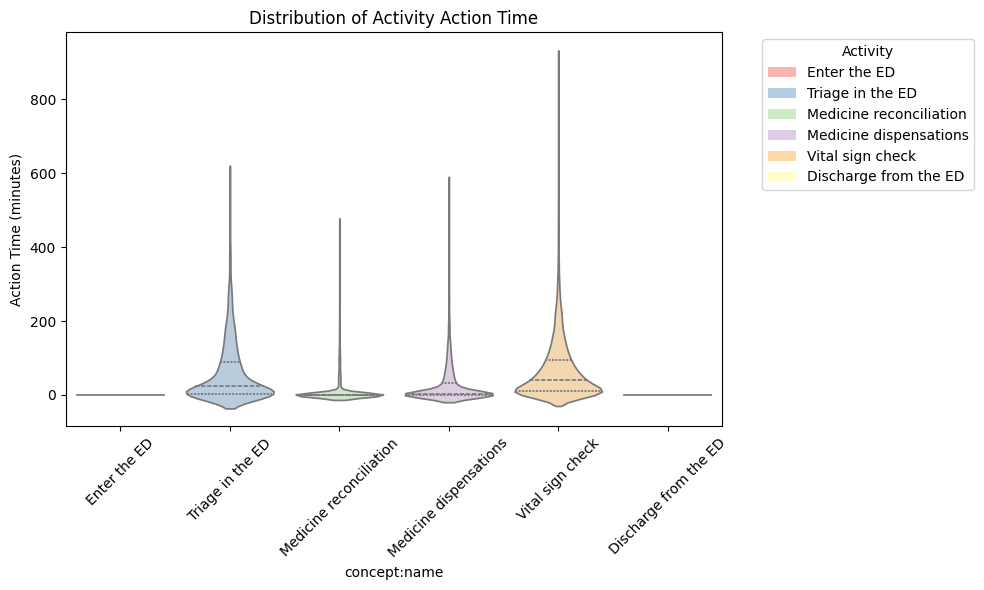

In [17]:
# ensure chronological order
clean_log = clean_log.sort_values(by=['case:concept:name', 'time:timestamp'])

# summary statistics per activity (ACTION TIME)
activity_stats = clean_log.groupby('concept:name')['action_time_minutes'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
).sort_values('count', ascending=False)

print("=== Activity Action Time Summary ===")
print(activity_stats)


# Box plot of ACTIVITY ACTION TIME
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=clean_log,
    x='concept:name',
    y='action_time_minutes',
    palette="Pastel1"
)

plt.xticks(rotation=45)
plt.ylabel("Action Time (minutes)")
plt.title("Activity Action Time Distribution (Box Plot)")

plt.grid(axis='y', linestyle='--', alpha=0.7)

from matplotlib.patches import Patch
activities = clean_log['concept:name'].unique()
colors = sns.color_palette("Pastel1", n_colors=len(activities))
legend_elements = [
    Patch(facecolor=colors[i], label=activities[i])
    for i in range(len(activities))
]
ax.legend(handles=legend_elements, title="Activity",
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Violin plot of ACTIVITY ACTION TIME
plt.figure(figsize=(10, 6))
ax = sns.violinplot(
    data=clean_log,
    x='concept:name',
    y='action_time_minutes',
    inner='quartile',
    scale='width',
    palette="Pastel1"
)

plt.xticks(rotation=45)
plt.ylabel("Action Time (minutes)")
plt.title("Distribution of Activity Action Time")

activities = clean_log['concept:name'].unique()
colors = sns.color_palette("Pastel1", n_colors=len(activities))
legend_elements = [
    Patch(facecolor=colors[i], label=activities[i])
    for i in range(len(activities))
]
ax.legend(handles=legend_elements, title="Activity",
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/3061729201.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


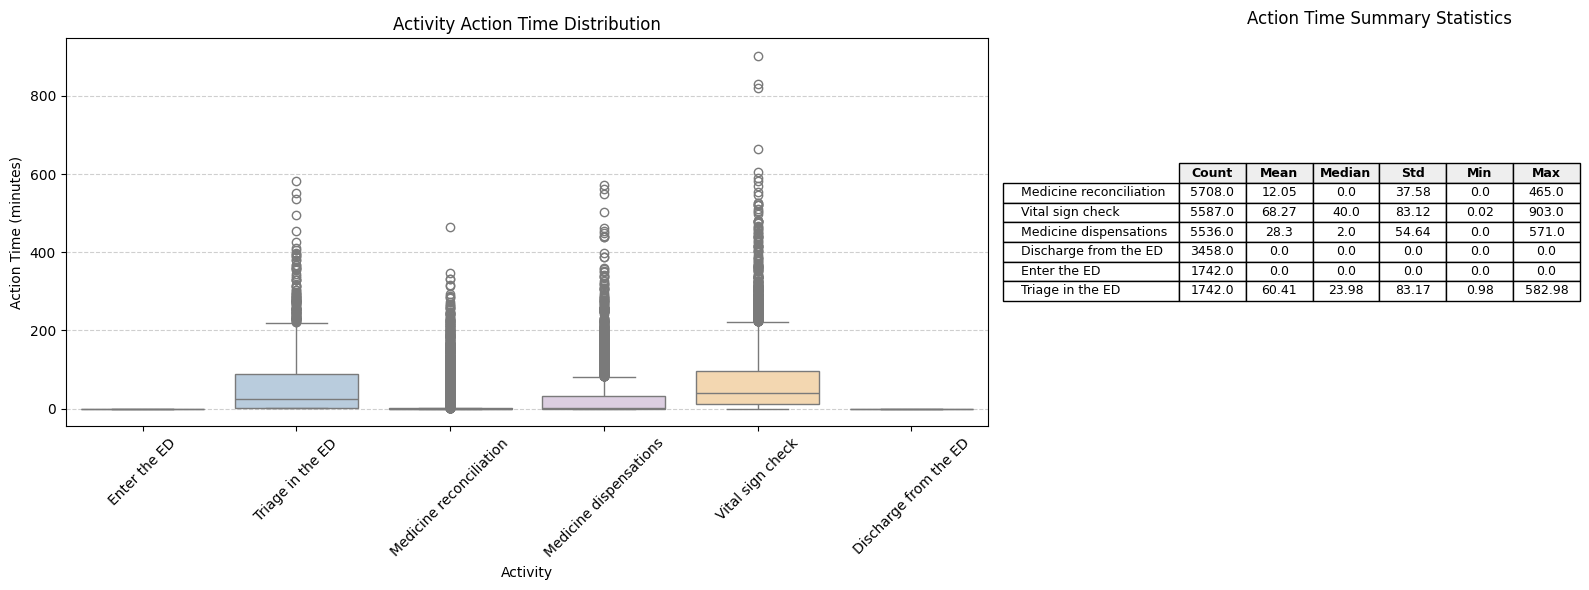

In [18]:
# Summary statistics per activity
activity_stats = (
    clean_log
    .groupby('concept:name')['action_time_minutes']
    .agg(
        Count='count',
        Mean='mean',
        Median='median',
        Std='std',
        Min='min',
        Max='max'
    )
    .sort_values('Count', ascending=False)
    .round(2)
)

fig, axes = plt.subplots(
    1, 2,
    figsize=(16, 6),
    gridspec_kw={'width_ratios': [2.3, 1]}
)

sns.boxplot(
    data=clean_log,
    x='concept:name',
    y='action_time_minutes',
    palette="Pastel1",
    ax=axes[0]
)

axes[0].set_title("Activity Action Time Distribution", fontsize=12)
axes[0].set_xlabel("Activity")
axes[0].set_ylabel("Action Time (minutes)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

axes[1].axis('off')

table = axes[1].table(
    cellText=activity_stats.values,
    colLabels=activity_stats.columns,
    rowLabels=activity_stats.index,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.4)

# Header styling
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#EEEEEE')

axes[1].set_title("Action Time Summary Statistics", fontsize=12, pad=10)

plt.tight_layout()
plt.show()


In [18]:
# print integral first case of clean_log
print("\n=== First Case in Cleaned Log ===")
first_case_id = clean_log['case:concept:name'].iloc[0]
first_case_events = clean_log[clean_log['case:concept:name'] == first_case_id]
print(first_case_events[['case:concept:name',
                         'time:timestamp',
                         'next_timestamp',
                         'action_time_minutes',
                         'concept:name',
                         'LT_minutes',
                         'incremental_LT_minutes']])



=== First Case in Cleaned Log ===
   case:concept:name      time:timestamp      next_timestamp  \
0           30005370 2110-06-25 05:10:00 2110-06-25 05:10:01   
1           30005370 2110-06-25 05:10:01 2110-06-25 05:28:00   
2           30005370 2110-06-25 05:28:00 2110-06-25 05:28:00   
3           30005370 2110-06-25 05:28:00 2110-06-25 05:28:00   
4           30005370 2110-06-25 05:28:00 2110-06-25 05:28:00   
5           30005370 2110-06-25 05:28:00 2110-06-25 05:28:00   
6           30005370 2110-06-25 05:28:00 2110-06-25 05:28:00   
7           30005370 2110-06-25 05:28:00 2110-06-25 05:28:00   
8           30005370 2110-06-25 05:28:00 2110-06-25 05:28:00   
9           30005370 2110-06-25 05:28:00 2110-06-25 05:28:00   
10          30005370 2110-06-25 05:28:00 2110-06-25 05:29:00   
11          30005370 2110-06-25 05:29:00 2110-06-25 05:29:00   
12          30005370 2110-06-25 05:29:00 2110-06-25 05:31:00   
13          30005370 2110-06-25 05:31:00 2110-06-25 05:31:00   
14   

/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/2548574921.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/2548574921.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/2548574921.py:62: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/2548574921.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

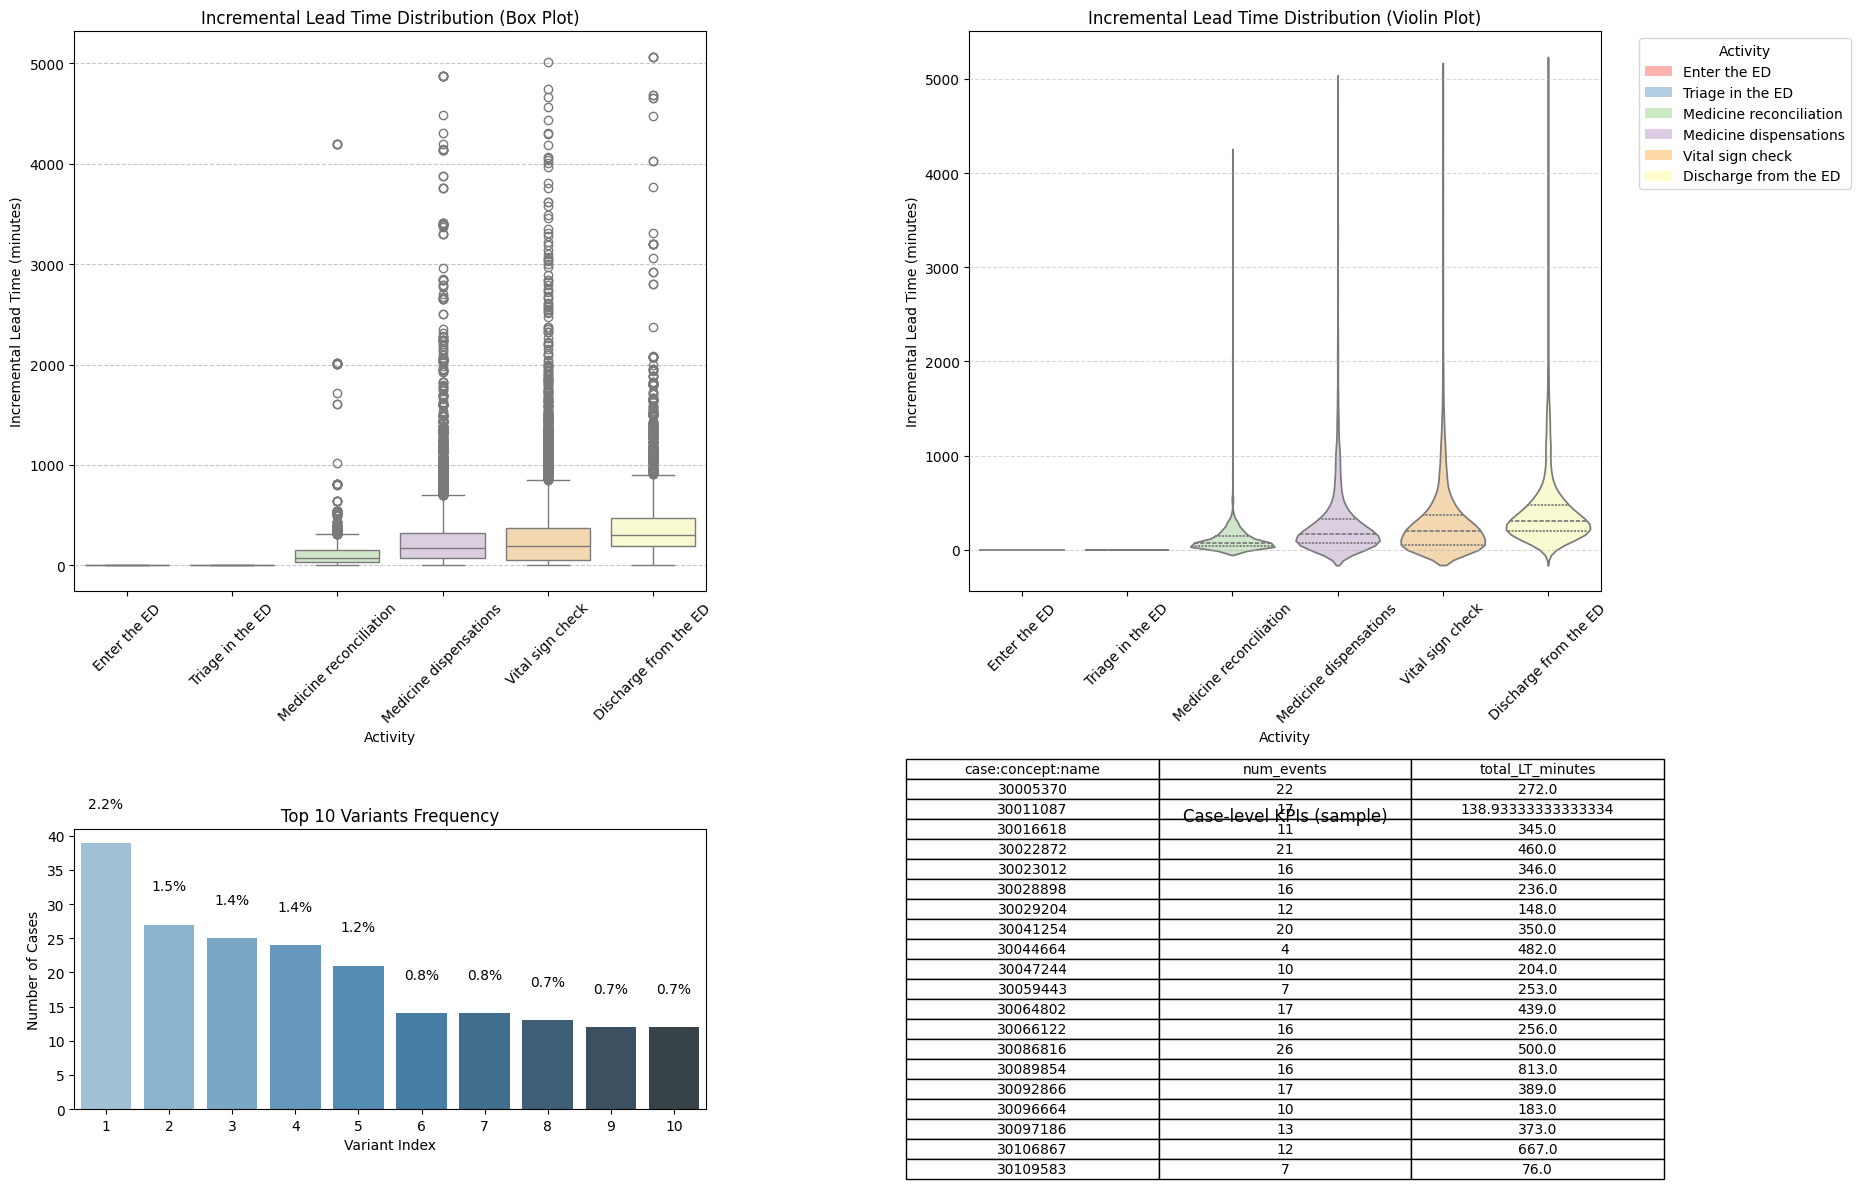


=== Median Incremental Lead Time per Activity ===
concept:name
Discharge from the ED      302.500000
Vital sign check           194.000000
Medicine dispensations     171.000000
Medicine reconciliation     73.000000
Triage in the ED             0.016667
Enter the ED                 0.000000
Name: incremental_LT_minutes, dtype: float64


In [20]:
# Prepare data (INCREMENTAL LT)
from matplotlib import gridspec


activity_kpis = (
    clean_log
    .groupby('concept:name')
    .agg(
        count=('concept:name', 'count'),
        median_incremental_LT_minutes=('incremental_LT_minutes', 'median')
    )
    .sort_values('median_incremental_LT_minutes', ascending=False)
)

critical_activities = activity_kpis.head(10).index.tolist()

# Variant analysis
variants_dict = pm4py.get_variants(
    clean_log,
    case_id_key="case:concept:name",
    activity_key="concept:name"
)

variants_df = pd.DataFrame(
    list(variants_dict.items()),
    columns=["variant", "frequency"]
)

variants_df["percentage"] = 100 * variants_df["frequency"] / variants_df["frequency"].sum()
variants_df = variants_df.sort_values("frequency", ascending=False).reset_index(drop=True)
variants_df["variant_index"] = variants_df.index + 1

top_variants = variants_df.head(10)

# Create dashboard layout
fig = plt.figure(figsize=(22, 12))
gs = gridspec.GridSpec(
    nrows=2,
    ncols=3,
    height_ratios=[2, 1],
    width_ratios=[2, 2, 1]
)

# --- Box plot: incremental LT ---
ax0 = fig.add_subplot(gs[0, 0])
sns.boxplot(
    data=clean_log,
    x='concept:name',
    y='incremental_LT_minutes',
    palette="Pastel1",
    ax=ax0
)

ax0.set_title("Incremental Lead Time Distribution (Box Plot)")
ax0.set_ylabel("Incremental Lead Time (minutes)")
ax0.set_xlabel("Activity")
ax0.tick_params(axis='x', rotation=45)
ax0.grid(axis='y', linestyle='--', alpha=0.7)

# --- Violin plot: incremental LT ---
ax1 = fig.add_subplot(gs[0, 1])
sns.violinplot(
    data=clean_log,
    x='concept:name',
    y='incremental_LT_minutes',
    palette="Pastel1",
    inner='quartile',
    scale='width',
    ax=ax1
)

ax1.set_title("Incremental Lead Time Distribution (Violin Plot)")
ax1.set_ylabel("Incremental Lead Time (minutes)")
ax1.set_xlabel("Activity")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# --- Legend (shared) ---
activities = clean_log['concept:name'].unique()
colors = sns.color_palette("Pastel1", n_colors=len(activities))
legend_elements = [
    Patch(facecolor=colors[i], label=activities[i])
    for i in range(len(activities))
]

ax1.legend(
    handles=legend_elements,
    title="Activity",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# --- Top variants bar chart ---
ax2 = fig.add_subplot(gs[1, 0])
sns.barplot(
    data=top_variants,
    x='variant_index',
    y='frequency',
    palette="Blues_d",
    ax=ax2
)

ax2.set_title("Top 10 Variants Frequency")
ax2.set_xlabel("Variant Index")
ax2.set_ylabel("Number of Cases")

for _, row in top_variants.iterrows():
    ax2.text(
        row['variant_index'] - 1,
        row['frequency'] + 5,
        f"{row['percentage']:.1f}%",
        ha='center'
    )

# --- Case-level KPI table ---
ax3 = fig.add_subplot(gs[1, 1])
ax3.axis('off')

case_summary = (
    clean_log
    .groupby('case:concept:name')
    .agg(
        num_events=('concept:name', 'count'),
        total_LT_minutes=('LT_minutes', 'max')
    )
    .reset_index()
    .head(20)
)

table = ax3.table(
    cellText=case_summary.values,
    colLabels=case_summary.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

ax3.set_title("Case-level KPIs (sample)")

plt.tight_layout()
plt.show()

# -------------------------------
# Median incremental LT per activity (print)
# -------------------------------
print("\n=== Median Incremental Lead Time per Activity ===")
print(
    clean_log
    .groupby('concept:name')['incremental_LT_minutes']
    .median()
    .sort_values(ascending=False)
)


In [21]:
# Average Action Time per activity
activity_action_stats = clean_log.groupby('concept:name')['action_time_minutes'].agg(
    mean_action_time='mean',
    median_action_time='median',
    count='count'
).sort_values('mean_action_time', ascending=False)

print("\n=== Average Action Time per Activity ===")
print(activity_action_stats)



=== Average Action Time per Activity ===
                         mean_action_time  median_action_time  count
concept:name                                                        
Vital sign check                68.273203           40.000000   5587
Triage in the ED                60.407931           23.983333   1742
Medicine dispensations          28.296131            2.000000   5536
Medicine reconciliation         12.050383            0.000000   5708
Discharge from the ED            0.000000            0.000000   3458
Enter the ED                     0.000000            0.000000   1742


In [22]:
# count of activity occurrences
activity_counts = clean_log['concept:name'].value_counts()
print("\n=== Activity Occurrence Counts ===")
print(activity_counts)


=== Activity Occurrence Counts ===
concept:name
Medicine reconciliation    5708
Vital sign check           5587
Medicine dispensations     5536
Discharge from the ED      3458
Enter the ED               1742
Triage in the ED           1742
Name: count, dtype: int64


## Subgroup analysis

SUBGROUP ANALYSIS FOR: acuity

Value counts:
   acuity  count
0     NaN  22086
1     3.0    852
2     2.0    580
3     4.0    137
4     1.0    111
5     5.0      7


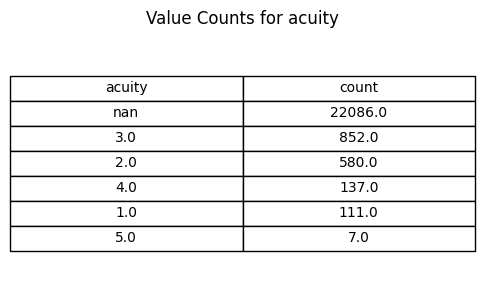


Subgroup statistics:
   acuity  num_cases  num_events  median_LT  median_action_time
0     3.0        852         852      292.0           35.983333
1     2.0        580         580      366.0           13.983333
2     4.0        137         137      165.0           42.983333
3     1.0        111         111      274.0            4.983333
4     5.0          7           7       88.0           37.983333


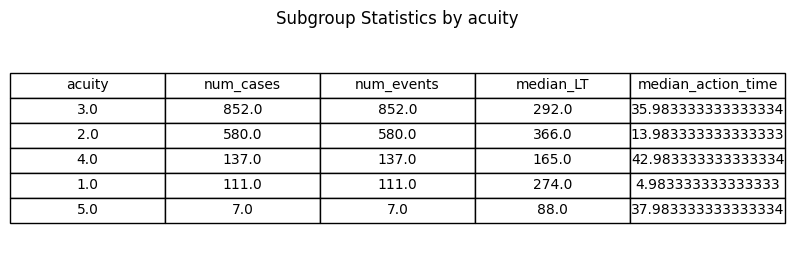

/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/2686915409.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


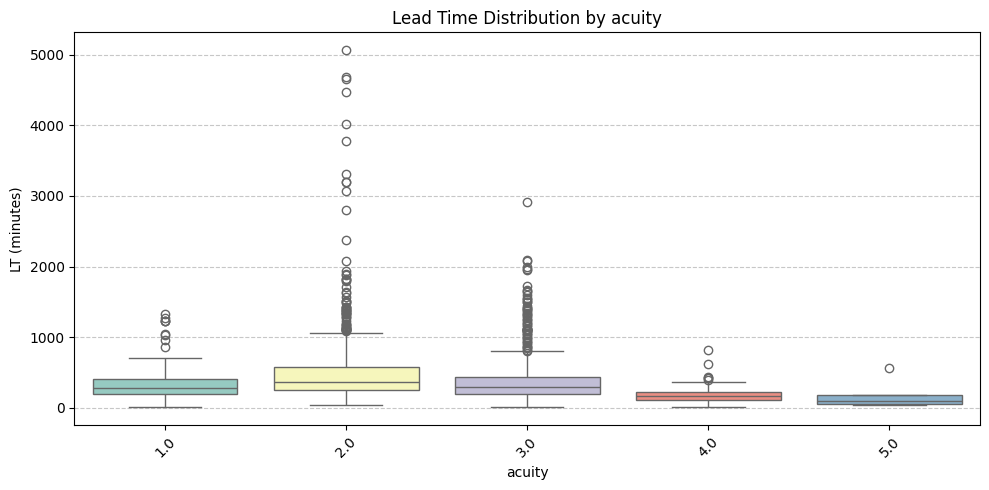

SUBGROUP ANALYSIS FOR: arrival_transport

Value counts:
  arrival_transport  count
0               NaN  22031
1           WALK IN    987
2         AMBULANCE    661
3           UNKNOWN     80
4        HELICOPTER      7
5             OTHER      7


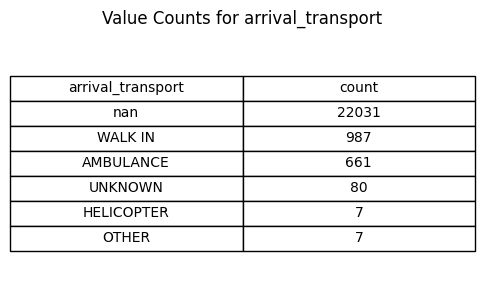


Subgroup statistics:
  arrival_transport  num_cases  num_events  median_LT  median_action_time
0           WALK IN        987         987      278.0                 0.0
1         AMBULANCE        661         661      357.0                 0.0
2           UNKNOWN         80          80      159.0                 0.0
3        HELICOPTER          7           7      264.0                 0.0
4             OTHER          7           7      236.0                 0.0


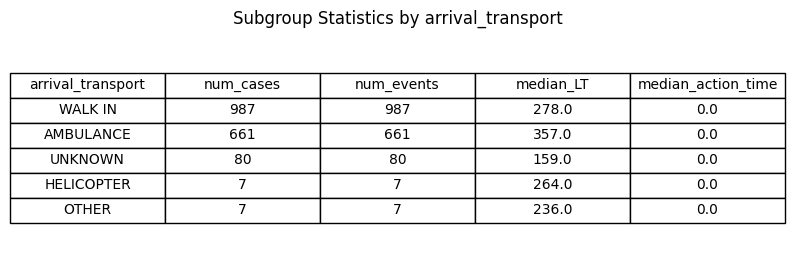

/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/2686915409.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


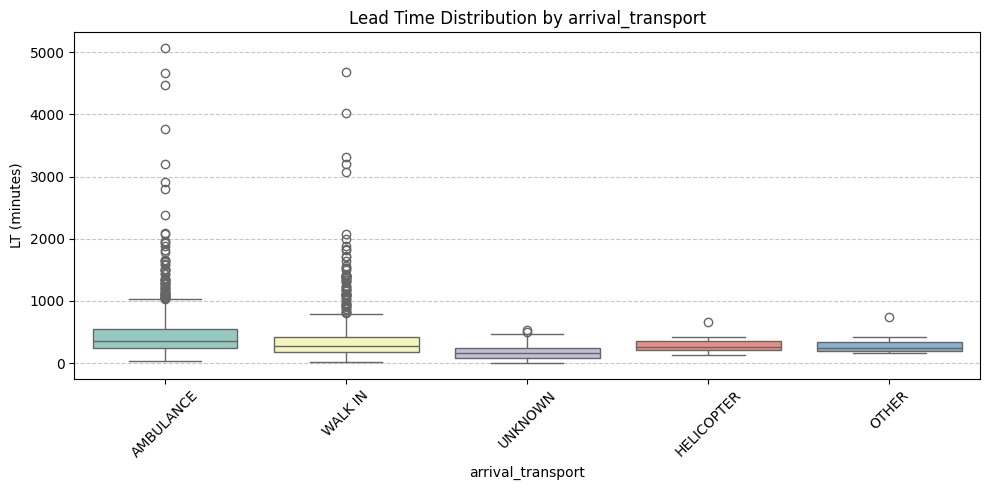

SUBGROUP ANALYSIS FOR: disposition

Value counts:
                   disposition  count
0                          NaN  20315
1                         HOME   2202
2                     ADMITTED   1056
3                     TRANSFER     78
4                        OTHER     45
5                       ELOPED     35
6      LEFT WITHOUT BEING SEEN     26
7  LEFT AGAINST MEDICAL ADVICE     12
8                      EXPIRED      4


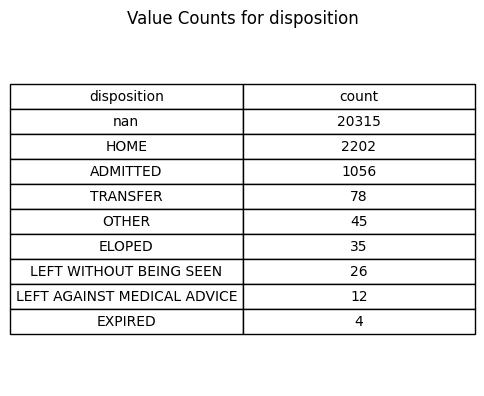


Subgroup statistics:
                   disposition  num_cases  num_events    median_LT  \
0                         HOME       1058        2202   290.000000   
1                     ADMITTED        572        1056   323.000000   
2                     TRANSFER         30          78  1016.000000   
3                        OTHER         28          45   153.383333   
4      LEFT WITHOUT BEING SEEN         23          26    79.500000   
5                       ELOPED         22          35   278.000000   
6  LEFT AGAINST MEDICAL ADVICE          6          12   225.000000   
7                      EXPIRED          3           4   360.000000   

   median_action_time  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
5                 0.0  
6                 0.0  
7                 0.0  


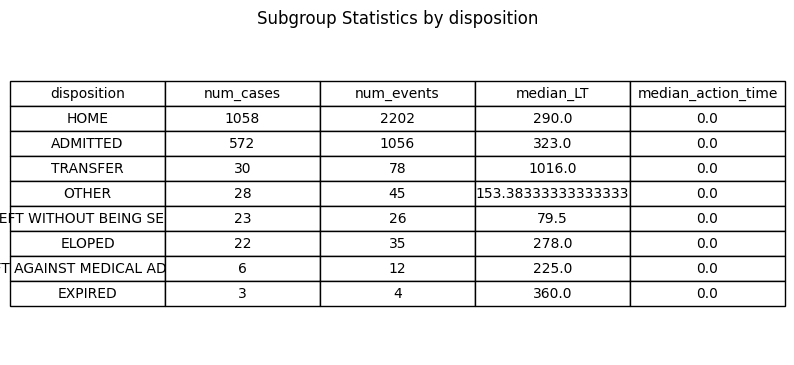

/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/2686915409.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


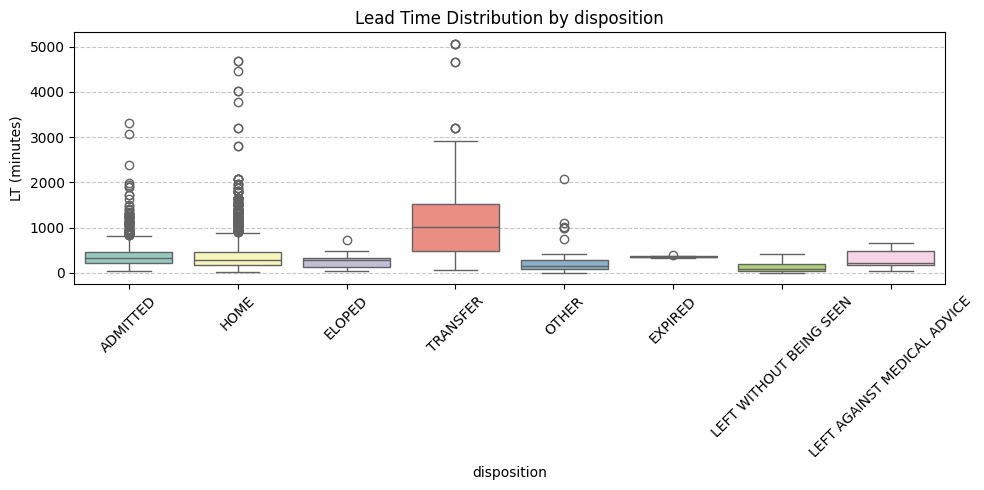

In [23]:
def subgroup_analysis(df, column):
    print(f"SUBGROUP ANALYSIS FOR: {column}")

    value_counts = df[column].value_counts(dropna=False).reset_index()
    value_counts.columns = [column, 'count']

    print("\nValue counts:")
    print(value_counts)

    # Plot value counts as simple table
    fig, ax = plt.subplots(figsize=(6, len(value_counts)*0.4 + 1))
    ax.axis('off')
    table = ax.table(
        cellText=value_counts.values,
        colLabels=value_counts.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    plt.title(f"Value Counts for {column}")
    plt.show()

    # Subgroup metrics
    subgroup_stats = df.groupby(column).agg(
        num_cases=('case:concept:name', 'nunique'),
        num_events=('concept:name', 'count'),
        median_LT=('LT_minutes', 'median'),
        median_action_time=('action_time_minutes', 'median')
    ).sort_values('num_cases', ascending=False).reset_index()

    print("\nSubgroup statistics:")
    print(subgroup_stats)

    # Plot subgroup metrics as simple white table
    fig, ax = plt.subplots(figsize=(10, len(subgroup_stats)*0.4 + 1))
    ax.axis('off')
    table = ax.table(
        cellText=subgroup_stats.values,
        colLabels=subgroup_stats.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    plt.title(f"Subgroup Statistics by {column}")
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(
        data=df,
        x=column,
        y='LT_minutes',
        palette='Set3'
    )
    plt.title(f"Lead Time Distribution by {column}")
    plt.ylabel("LT (minutes)")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return subgroup_stats

acuity_stats = subgroup_analysis(clean_log, 'acuity')
arrival_stats = subgroup_analysis(clean_log, 'arrival_transport')
disposition_stats = subgroup_analysis(clean_log, 'disposition')


In [24]:
# count all casese with elicopter as arrival transport
helicopter_cases = clean_log[clean_log['arrival_transport'] == 'HELICOPTER']['case:concept:name'].unique()
print(f"Number of cases with helicopter as arrival transport: {len(helicopter_cases)}")

# print for all 7 cases the first 2 activities
for case_id in helicopter_cases:
    case_events = clean_log[clean_log['case:concept:name'] == case_id]
    first_two_activities = case_events['concept:name'].head(30).tolist()
    print(f"Case ID: {case_id}, First two activities: {first_two_activities}")

Number of cases with helicopter as arrival transport: 7
Case ID: 30227983, First two activities: ['Enter the ED', 'Triage in the ED', 'Medicine dispensations', 'Medicine dispensations', 'Medicine dispensations', 'Medicine dispensations', 'Vital sign check', 'Vital sign check', 'Vital sign check', 'Vital sign check', 'Vital sign check', 'Medicine reconciliation', 'Medicine reconciliation', 'Medicine reconciliation', 'Medicine reconciliation', 'Medicine reconciliation', 'Medicine reconciliation', 'Medicine reconciliation', 'Medicine reconciliation', 'Medicine reconciliation', 'Medicine reconciliation', 'Medicine reconciliation', 'Vital sign check', 'Vital sign check', 'Vital sign check', 'Discharge from the ED', 'Discharge from the ED', 'Discharge from the ED', 'Discharge from the ED']
Case ID: 30236819, First two activities: ['Enter the ED', 'Vital sign check', 'Triage in the ED', 'Medicine dispensations', 'Vital sign check', 'Medicine dispensations', 'Vital sign check', 'Medicine dispe

In [25]:
# print all the type of arrival_transport in the cleaned log
arrival_types = clean_log['arrival_transport'].unique()
print(f"Types of arrival transport in cleaned log: {arrival_types}")

# Count occurrences of each type
arrival_type_counts = clean_log['arrival_transport'].value_counts()
print("Counts of each arrival transport type:")
print(arrival_type_counts)

Types of arrival transport in cleaned log: ['AMBULANCE' nan 'WALK IN' 'UNKNOWN' 'HELICOPTER' 'OTHER']
Counts of each arrival transport type:
arrival_transport
WALK IN       987
AMBULANCE     661
UNKNOWN        80
HELICOPTER      7
OTHER           7
Name: count, dtype: int64


In [26]:
# print the mean lead time for helicopter,ambulance and walk in cases
for transport_type in ['HELICOPTER', 'AMBULANCE', 'WALK IN']:
    transport_cases = clean_log[clean_log['arrival_transport'] == transport_type]['case:concept:name'].unique()
    transport_log = clean_log[clean_log['case:concept:name'].isin(transport_cases)]
    mean_LT = transport_log.groupby('case:concept:name')['LT_minutes'].max().mean()
    print(f"Mean Lead Time for {transport_type}: {mean_LT:.2f} minutes")

Mean Lead Time for HELICOPTER: 310.43 minutes
Mean Lead Time for AMBULANCE: 499.28 minutes
Mean Lead Time for WALK IN: 368.55 minutes


In [27]:
# filter all cases with walk in as arrival transport
walkin_cases = clean_log[clean_log['arrival_transport'] == 'WALK IN']

# take all the unique case ids
unique_case_ids = walkin_cases['case:concept:name'].unique()
print(f"Numero di casi con 'Walk-in': {len(unique_case_ids)}")

# print all events for walkin cases
walkin_full_cases = clean_log[clean_log['case:concept:name'].isin(unique_case_ids)]

walkin_full_cases = walkin_full_cases.sort_values(by=['case:concept:name', 'time:timestamp'])
print(walkin_full_cases)


Numero di casi con 'Walk-in': 987
      case:concept:name      time:timestamp             concept:name gender  \
39             30016618 2110-04-26 00:33:00             Enter the ED      F   
40             30016618 2110-04-26 00:33:01         Triage in the ED    NaN   
41             30016618 2110-04-26 00:35:00         Vital sign check    NaN   
42             30016618 2110-04-26 03:51:00         Vital sign check    NaN   
43             30016618 2110-04-26 05:07:00   Medicine dispensations    NaN   
...                 ...                 ...                      ...    ...   
25110          39999292 2110-08-15 00:48:00         Vital sign check    NaN   
25111          39999292 2110-08-15 00:48:01         Triage in the ED    NaN   
25112          39999292 2110-08-15 01:23:00  Medicine reconciliation    NaN   
25113          39999292 2110-08-15 02:57:00         Vital sign check    NaN   
25114          39999292 2110-08-15 03:02:00    Discharge from the ED    NaN   

        race arri

# trace discovery

In [28]:
# Variant analysis (top 10)
variants_dict = pm4py.get_variants(
    clean_log,
    case_id_key="case:concept:name",
    activity_key="concept:name"
)

variants_df = pd.DataFrame(
    list(variants_dict.items()),
    columns=["variant", "frequency"]
)

variants_df["percentage"] = 100 * variants_df["frequency"] / variants_df["frequency"].sum()
variants_df = variants_df.sort_values("frequency", ascending=False).reset_index(drop=True)
variants_df["variant_index"] = variants_df.index + 1
variants_df["variant_length"] = variants_df["variant"].apply(len)

print("\n=== Top 10 Variants ===")
print(variants_df.head(10))

# Coverage of top 5 variants
top5_coverage = variants_df["percentage"].head(5).sum()
print(f"\nTop 5 variants cover {top5_coverage:.2f}% of cases")


=== Top 10 Variants ===
                                             variant  frequency  percentage  \
0  (Enter the ED, Triage in the ED, Vital sign ch...         39    2.238806   
1  (Enter the ED, Triage in the ED, Discharge fro...         27    1.549943   
2  (Enter the ED, Triage in the ED, Vital sign ch...         25    1.435132   
3  (Enter the ED, Triage in the ED, Vital sign ch...         24    1.377727   
4  (Enter the ED, Triage in the ED, Vital sign ch...         21    1.205511   
5  (Enter the ED, Vital sign check, Triage in the...         14    0.803674   
6  (Enter the ED, Triage in the ED, Vital sign ch...         14    0.803674   
7  (Enter the ED, Vital sign check, Triage in the...         13    0.746269   
8  (Enter the ED, Triage in the ED, Medicine disp...         12    0.688863   
9  (Enter the ED, Triage in the ED, Discharge fro...         12    0.688863   

   variant_index  variant_length  
0              1               4  
1              2               3  


Number of unique variants: 1248
Top 10 variants cover 11.54% of cases


/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/3346750878.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


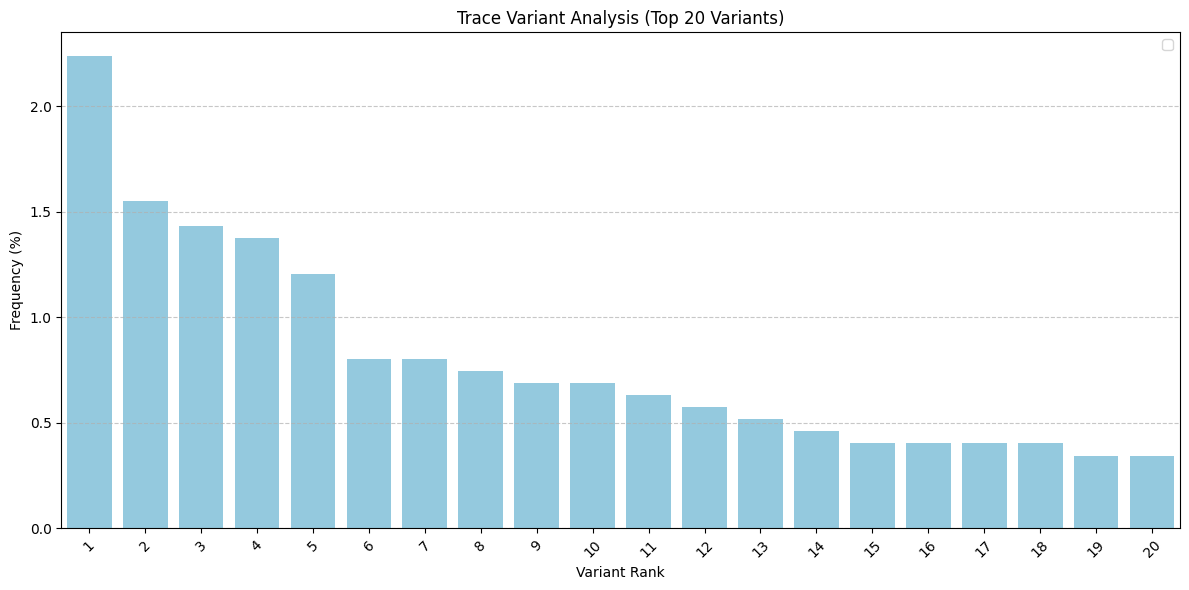

Plot salvato come variant_analysis_pareto.png


In [29]:
variants_dict = pm4py.get_variants(
    clean_log,
    case_id_key="case:concept:name",
    activity_key="concept:name"
)

variants_df = pd.DataFrame(
    list(variants_dict.items()),
    columns=["variant", "frequency"]
)

variants_df = variants_df.sort_values("frequency", ascending=False).reset_index(drop=True)
variants_df["variant_index"] = variants_df.index + 1

variants_df["percentage"] = 100 * variants_df["frequency"] / variants_df["frequency"].sum()

variants_df["cumulative_percentage"] = variants_df["percentage"].cumsum()

num_variants = len(variants_df)
top10_coverage = variants_df["percentage"].head(10).sum()

print(f"Number of unique variants: {num_variants}")
print(f"Top 10 variants cover {top10_coverage:.2f}% of cases")


plt.figure(figsize=(12, 6))
sns.barplot(
    x="variant_index",
    y="percentage",
    data=variants_df.head(20),  
    color="skyblue"
)
plt.xlabel("Variant Rank")
plt.ylabel("Frequency (%)")
plt.title("Trace Variant Analysis (Top 20 Variants)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Salva in PNG
plt.tight_layout()
plt.savefig("variant_analysis_pareto.png")
plt.show()
print("Plot salvato come variant_analysis_pareto.png")


In [32]:
# VARIANT ANALYSIS ON FILTERED LOG
print("VARIANT ANALYSIS")

variants_dict = pm4py.get_variants(
    clean_log,
    case_id_key="case:concept:name",
    activity_key="concept:name"
)

variants_df = pd.DataFrame(
    list(variants_dict.items()),
    columns=["variant", "frequency"]
)

variants_df["percentage"] = 100 * variants_df["frequency"] / variants_df["frequency"].sum()

variants_df = variants_df.sort_values("frequency", ascending=False).reset_index(drop=True)

variants_df["variant_index"] = variants_df.index + 1

variants_df["variant_length"] = variants_df["variant"].apply(len)

num_variants = len(variants_df)
top10_coverage = variants_df["percentage"].head(10).sum()


variants_df

VARIANT ANALYSIS


,variant,frequency,percentage,variant_index,variant_length
0,"(Enter the ED, Triage in the ED, Vital sign ch...",39,2.238806,1,4
1,"(Enter the ED, Triage in the ED, Discharge fro...",27,1.549943,2,3
2,"(Enter the ED, Triage in the ED, Vital sign ch...",25,1.435132,3,5
3,"(Enter the ED, Triage in the ED, Vital sign ch...",24,1.377727,4,6
4,"(Enter the ED, Triage in the ED, Vital sign ch...",21,1.205511,5,5
...,...,...,...,...,...
1243,"(Enter the ED, Vital sign check, Triage in the...",1,0.057405,1244,18
1244,"(Enter the ED, Triage in the ED, Medicine reco...",1,0.057405,1245,30
1245,"(Enter the ED, Triage in the ED, Vital sign ch...",1,0.057405,1246,16
1246,"(Enter the ED, Triage in the ED, Vital sign ch...",1,0.057405,1247,17


# process discovery

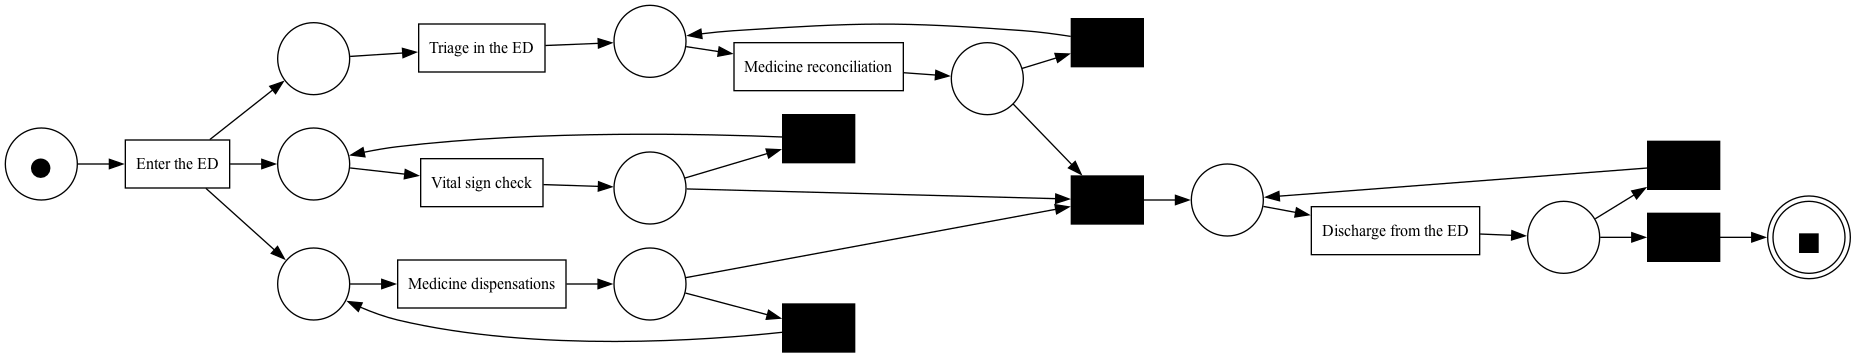

In [33]:
net, im, fm = pm4py.discover_petri_net_inductive(
    clean_log,
    noise_threshold=0.07
)
pm4py.view_petri_net(net, im, fm, format='png')

In [34]:
def compute_f1_for_model(log, net, im, fm, beta=1.0):
    """
    Computes Fitness, Precision, and F1-score (beta-F score)
    for a given Petri net model (net, im, fm).

    The logic is identical to `find_best_k_by_f1`:
    - token-based fitness → fitness_token_based_replay
    - token-based precision → precision_token_based_replay
    - F1 computed as in the algorithm
    """

    # --- FITNESS ---
    fitness_res = pm4py.fitness_token_based_replay(log, net, im, fm)
    fitness_value = fitness_res.get("average_trace_fitness",
                                    fitness_res.get("fitness", None))
    if fitness_value is None:
        raise RuntimeError("Unable to extract fitness value.")

    # --- PRECISION ---
    precision_value = pm4py.precision_token_based_replay(log, net, im, fm)

    # --- F1 SCORE ---
    f1_value = (
        (1 + beta**2) * precision_value * fitness_value /
        (beta**2 * precision_value + fitness_value + 1e-12)
    )

    return {
        "fitness": fitness_value,
        "precision": precision_value,
        "f1": f1_value
    }


In [35]:
metrics = compute_f1_for_model(clean_log, net, im, fm, beta=1)

print("Fitness:", metrics["fitness"])
print("Precision:", metrics["precision"])
print("F1:", metrics["f1"])


replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7594 [00:00<?, ?it/s]

Fitness: 0.9144060428983168
Precision: 0.6811430064903952
F1: 0.7807234524704556


In [34]:
# # petri net after alphha miner
# net_alpha, im_alpha, fm_alpha = pm4py.discover_petri_net_alpha(clean_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
# pm4py.view_petri_net(net_alpha, im_alpha, fm_alpha, format='png')

In [35]:
# from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
# from pm4py.visualization.petri_net import visualizer as pn_visualizer
# from IPython.display import display

# parameters = {
#     "activity_key": "concept:name",
#     "case_id_key": "case:concept:name"
# }

# net_heuristic, im_heuristic, fm_heuristic = heuristics_miner.apply(clean_log, parameters=parameters)


# gviz = pn_visualizer.apply(net_heuristic, im_heuristic, fm_heuristic)

# # Mostra il Petri Net direttamente nel notebook
# pn_visualizer.view(gviz)  


# pn_visualizer.save(gviz, "heuristic_net.png")
# print("Petri Net salvato come 'heuristic_net.png'")


# metrics_heuristic = compute_f1_for_model(clean_log, net_heuristic, im_heuristic, fm_heuristic, beta=0.5)

# # Mostra le metriche subito sotto il grafico
# print("\n=== Metrics Heuristic Miner ===")
# display(metrics_heuristic)



In [38]:
def find_best_k_by_f1(log, k_values, activity_key='concept:name',
                      case_id_key='case:concept:name', timestamp_key='time:timestamp',
                      discovery_algo=pm4py.discover_petri_net_inductive, beta=1.0):
    """
    For a given event log, iteratively filter by top-k variants, discover a Petri net
    from each filtered log, compute fitness/precision/F1, and return the k with best F1.

    Parameters
    ----------
    log : pm4py.objects.log.obj.EventLog
    k_values : iterable of int
        k values to test (e.g., range(1,21))
    activity_key, case_id_key, timestamp_key : str
        Keys to pass to discovery (and used by pm4py functions)
    discovery_algo : callable
        Function used to discover the petri net. Must accept (log, activity_key=..., case_id_key=..., timestamp_key=...)
        and return (net, im, fm).

    Returns
    -------
    dict with:
      - best_k
      - baseline_full_log_f1
      - results: dict keyed by k with metrics
    """

    def discover_net_from(l):
        # discover and return net, im, fm for a given log
        return discovery_algo(l,
                              activity_key=activity_key,
                              case_id_key=case_id_key,
                              timestamp_key=timestamp_key)

    # --- Baseline on full log ---
    if len(log) == 0:
        raise ValueError("Input log is empty.")

    net_full, im_full, fm_full = discover_net_from(log)

    fitness_full = pm4py.fitness_token_based_replay(log, net_full, im_full, fm_full)
    fitness_full_value = fitness_full.get("average_trace_fitness",
                                          fitness_full.get("fitness", None))
    if fitness_full_value is None:
        # fallback if pm4py returns differently
        raise RuntimeError("Could not read fitness from fitness_token_based_replay result for full log.")

    precision_full_value = pm4py.precision_token_based_replay(log, net_full, im_full, fm_full)
    
    # Beta is a factor to decide if prioritazing fitness or precision 
    # β > 1: prioritize recall (fitness in process mining)
    # β < 1: prioritize precision
    # β = 1: becomes the usual F1 score

    # The + 1e-12 is only a numerical safeguard to avoid division by zero.
    baseline_f1 = (1+ beta**2) * precision_full_value * fitness_full_value / (beta**2 * precision_full_value + fitness_full_value  + 1e-12)

    print("BASELINE (FULL LOG)")
    print(f"- events: {len(log)}")
    print(f"- fitness: {fitness_full_value:.3f}")
    print(f"- precision: {precision_full_value:.3f}")
    print(f"- F1: {baseline_f1:.3f}\n")

    best_k = None
    best_f1 = -np.inf
    results = {}

    # --- Iterate over k values ---
    for k in k_values:
        rep_log = pm4py.filter_variants_top_k(log, k)

        # skip empty filtered logs
        if len(rep_log) == 0:
            print(f"[k={k}] filtered log is empty -> skipping")
            continue

        try:
            net_k, im_k, fm_k = discover_net_from(rep_log)
        except Exception as e:
            # discovery failed for this filtered log
            print(f"[k={k}] discovery failed: {e!r} -> skipping")
            continue

        # compute metrics
        fitness_k = pm4py.fitness_token_based_replay(log, net_k, im_k, fm_k)
        fitness_k_value = fitness_k.get("average_trace_fitness", fitness_k.get("fitness", None))
        if fitness_k_value is None:
            print(f"[k={k}] could not read fitness value -> skipping")
            continue

        precision_k_value = pm4py.precision_token_based_replay(log, net_k, im_k, fm_k)

        f1_k = (1+ beta**2) * precision_k_value * fitness_k_value / (beta**2 * precision_k_value + fitness_k_value  + 1e-12)

        results[k] = {
            "fitness": fitness_k_value,
            "precision": precision_k_value,
            "f1": f1_k,
            "num_traces": len(log)
        }
        if f1_k > best_f1:
            best_f1 = f1_k
            best_k = k

    # final summary
    if best_k is not None:
        print("\nBEST k:", best_k)
        print("metrics:", results[best_k])
    else:
        print("\nNo successful k produced metrics (all skipped or failed).")

    return {
        "best_k": best_k,
        "baseline_full_log_f1": baseline_f1,
        "results": results
    }


In [39]:
# 1. Define k values you want to test
k_values = range(1, 12) 

results = find_best_k_by_f1(clean_log, k_values, beta=1)

print("\n=== SUMMARY ===")
print("Best k:", results["best_k"])
print("Best k F1:", f"{results["baseline_full_log_f1"]:.3f}")
print("\nMetrics for each k:")

for k, metrics in results["results"].items():
    print(f"k={k}: {metrics}")


replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7594 [00:00<?, ?it/s]

BASELINE (FULL LOG)
- events: 23773
- fitness: 1.000
- precision: 0.679
- F1: 0.809



replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7594 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7594 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7594 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7594 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7594 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7594 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7594 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7594 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7594 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7594 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7594 [00:00<?, ?it/s]


BEST k: 9
metrics: {'fitness': 0.8783715159159119, 'precision': 0.8786655713112119, 'f1': 0.8785185190067015, 'num_traces': 23773}

=== SUMMARY ===
Best k: 9
Best k F1: 0.809

Metrics for each k:
k=1: {'fitness': 0.7125701255355261, 'precision': 0.8155497722836695, 'f1': 0.7605900616118052, 'num_traces': 23773}
k=2: {'fitness': 0.7316680259767102, 'precision': 0.8073817762399077, 'f1': 0.7676625273332053, 'num_traces': 23773}
k=3: {'fitness': 0.9079732349871229, 'precision': 0.6855174913902483, 'f1': 0.7812176424929702, 'num_traces': 23773}
k=4: {'fitness': 0.9846241202699632, 'precision': 0.698348304839177, 'f1': 0.817138266836778, 'num_traces': 23773}
k=5: {'fitness': 0.9846241202699632, 'precision': 0.698348304839177, 'f1': 0.817138266836778, 'num_traces': 23773}
k=6: {'fitness': 1.0, 'precision': 0.6888042097622936, 'f1': 0.8157300956264645, 'num_traces': 23773}
k=7: {'fitness': 1.0, 'precision': 0.6888042097622936, 'f1': 0.8157300956264645, 'num_traces': 23773}
k=8: {'fitness': 1

In [40]:
representative_sample = pm4py.filter_variants_top_k(
    clean_log,
    9,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:concept:name'
)

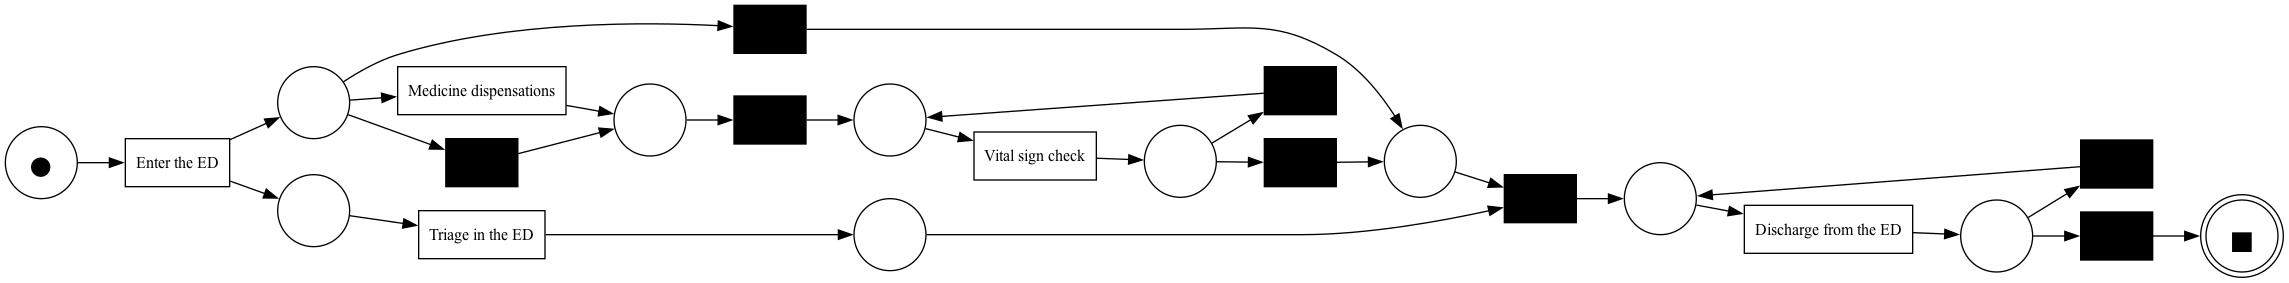

In [41]:
# Discovers a Petri net using the Inductive Miner algorithm for top k variants.

net, im, fm = pm4py.discover_petri_net_inductive(representative_sample, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, im, fm, format='png')

In [42]:
df_sample = representative_sample.copy()

df_sorted = df_sample.sort_values(by=['case:concept:name', 'time:timestamp'])

case_sequences = df_sorted.groupby('case:concept:name')['concept:name'].apply(list)

print("--- Order of Actions for Each Case (Top-K Variants) ---")
for case_id, sequence in case_sequences.items():
    print(f"\nCase ID {case_id}:")
    print(" -> ".join(sequence))

activity_to_search = 'medicine concilation'

is_present = (df_sample['concept:name'] == activity_to_search).any()

print("\n--- Check for Presence of Activity 'medicine concilation' ---")

if is_present:
    count = (df_sample['concept:name'] == activity_to_search).sum()
    
    cases_with_activity = df_sample[
        df_sample['concept:name'] == activity_to_search
    ]['case:concept:name'].nunique()
    
    print(f"The activity '{activity_to_search}' is present!")
    print(f"It appears {count} times in total, involving {cases_with_activity} unique cases.")
else:
    print(f"The activity '{activity_to_search}' is NOT present in the 'representative_sample' event log.")
    print("This means that all cases containing this activity were excluded by the 'Top-K variants' filter.")


--- Order of Actions for Each Case (Top-K Variants) ---

Case ID 30044664:
Enter the ED -> Triage in the ED -> Vital sign check -> Discharge from the ED

Case ID 30118708:
Enter the ED -> Triage in the ED -> Vital sign check -> Discharge from the ED -> Discharge from the ED

Case ID 30136631:
Enter the ED -> Triage in the ED -> Vital sign check -> Vital sign check -> Vital sign check -> Discharge from the ED

Case ID 30379464:
Enter the ED -> Triage in the ED -> Vital sign check -> Vital sign check -> Discharge from the ED -> Discharge from the ED

Case ID 30394571:
Enter the ED -> Vital sign check -> Triage in the ED -> Discharge from the ED

Case ID 30415269:
Enter the ED -> Triage in the ED -> Vital sign check -> Vital sign check -> Discharge from the ED

Case ID 30434332:
Enter the ED -> Triage in the ED -> Vital sign check -> Vital sign check -> Discharge from the ED

Case ID 30465785:
Enter the ED -> Triage in the ED -> Vital sign check -> Vital sign check -> Vital sign check -> 

# conformance checking

In [43]:
# Token-based replay
def perform_cc_tbr(log, petri_net, initial_marking, final_marking):
    diagnostic_df = pm4py.conformance_diagnostics_token_based_replay(
        log, petri_net, initial_marking, final_marking, return_diagnostics_dataframe=True
    )
    diagnostic_dic = pm4py.conformance_diagnostics_token_based_replay(
        log, petri_net, initial_marking, final_marking
    )
    diagnostic_ex = pd.DataFrame.from_dict(diagnostic_dic)
    merged_df = pd.merge(diagnostic_df, diagnostic_ex, left_index=True, right_index=True)
    return merged_df

# Alignments-based conformance
def perform_cc_al(log, petri_net, initial_marking, final_marking):
    diagnostic_df = pm4py.conformance_diagnostics_alignments(
        log, petri_net, initial_marking, final_marking, return_diagnostics_dataframe=True
    )
    diagnostic_dic = pm4py.conformance_diagnostics_alignments(
        log, petri_net, initial_marking, final_marking
    )
    diagnostic_ex = pd.DataFrame.from_dict(diagnostic_dic)
    merged_df = pd.merge(diagnostic_df, diagnostic_ex, left_index=True, right_index=True)
    return merged_df

# on general model
tbr_results_general = perform_cc_tbr(clean_log, net, im, fm)
alignments_results_general = perform_cc_al(clean_log, net, im, fm)

tbr_display = tbr_results_general[
    [
        'case_id',
        'trace_fitness_x',
        'missing_tokens',
        'remaining_tokens',
        'is_fit',
        'produced_tokens',
        'consumed_tokens'
    ]
].head()

print("\n=== Token-based Replay Results ===")
display.display(tbr_display)

al_display = alignments_results_general[
    [
        'case_id',
        'fitness_x',
        'cost_x',
        'is_fit',
        'alignment'
    ]
].head()

print("\n=== Alignments Results ===")
display.display(al_display)

metrics_general = compute_f1_for_model(clean_log, net, im, fm, beta=1)

print("\n=== Metrics MODELLO GENERALE ===")
print("Fitness:", metrics_general["fitness"])
print("Precision:", metrics_general["precision"])
print("F1:", metrics_general["f1"])


replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/1248 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/1248 [00:00<?, ?it/s]


=== Token-based Replay Results ===


,case_id,trace_fitness_x,missing_tokens,remaining_tokens,is_fit,produced_tokens,consumed_tokens
0,30005370,0.722222,5,5,False,18,18
1,30011087,0.489130,11,12,False,23,22
2,30016618,0.913043,2,2,False,23,23
3,30022872,0.925926,2,2,False,27,27
4,30023012,1.000000,0,0,True,15,15



=== Alignments Results ===


,case_id,fitness_x,cost_x,is_fit,alignment
0,30005370,0.360000,160005,False,"[(Enter the ED, Enter the ED), (Triage in the ..."
1,30011087,0.450000,110006,False,"[(Enter the ED, Enter the ED), (>>, None), (Tr..."
2,30016618,0.857143,20010,False,"[(Enter the ED, Enter the ED), (>>, None), (>>..."
3,30022872,0.625000,90011,False,"[(Enter the ED, Enter the ED), (Triage in the ..."
4,30023012,0.473684,100007,False,"[(Enter the ED, Enter the ED), (Triage in the ..."


replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/7594 [00:00<?, ?it/s]


=== Metrics MODELLO GENERALE ===
Fitness: 0.8783715159159119
Precision: 0.8786655713112119
F1: 0.8785185190067015


### Deviation map

In [42]:
clean_log

,case:concept:name,time:timestamp,concept:name,gender,race,arrival_transport,disposition,diagnosis_sequence,diagnosis_code,diagnosis_description,...,national_drug_code,reconciliation_nurse_id,drug_class_code,drug_class_classification,administering_nurse_id,next_timestamp,action_time_minutes,LT_minutes,first_timestamp,incremental_LT_minutes
0,30005370,2110-06-25 05:10:00,Enter the ED,F,WHITE,AMBULANCE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2110-06-25 05:10:01,0.000000,272.0,2110-06-25 05:10:00,0.000000
1,30005370,2110-06-25 05:10:01,Triage in the ED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2110-06-25 05:28:00,17.983333,272.0,2110-06-25 05:10:00,0.016667
2,30005370,2110-06-25 05:28:00,Medicine reconciliation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.659005e+10,1.0,457.0,Antiemetic - Selective Serotonin 5-HT3 Antagon...,NaN,2110-06-25 05:28:00,0.000000,272.0,2110-06-25 05:10:00,18.000000
3,30005370,2110-06-25 05:28:00,Medicine reconciliation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.671407e+10,1.0,445.0,Gastric Acid Secretion Reducing Agents - Proto...,NaN,2110-06-25 05:28:00,0.000000,272.0,2110-06-25 05:10:00,18.000000
4,30005370,2110-06-25 05:28:00,Medicine reconciliation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000301e+10,1.0,577.0,Analgesic or Antipyretic Non-Opioid,NaN,2110-06-25 05:28:00,0.000000,272.0,2110-06-25 05:10:00,18.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25110,39999292,2110-08-15 00:48:00,Vital sign check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2110-08-15 00:48:01,0.016667,134.0,2110-08-15 00:48:00,0.000000
25111,39999292,2110-08-15 00:48:01,Triage in the ED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2110-08-15 01:23:00,34.983333,134.0,2110-08-15 00:48:00,0.016667
25112,39999292,2110-08-15 01:23:00,Medicine reconciliation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.054406e+10,1.0,530.0,Antidepressant - Selective Serotonin Reuptake ...,NaN,2110-08-15 02:57:00,94.000000,134.0,2110-08-15 00:48:00,35.000000
25113,39999292,2110-08-15 02:57:00,Vital sign check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2110-08-15 03:02:00,5.000000,134.0,2110-08-15 00:48:00,129.000000


replaying log with TBR, completed traces ::   0%|          | 0/1248 [00:00<?, ?it/s]

--- Top 10 Cases with Highest Deviation ---
                   deviation_score
case:concept:name                 
32978731                        88
38568954                        56
36704041                        54
35646691                        50
39604138                        48
34200940                        46
37771018                        42
39563255                        42
36155165                        40
33485812                        40


/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/3361694881.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


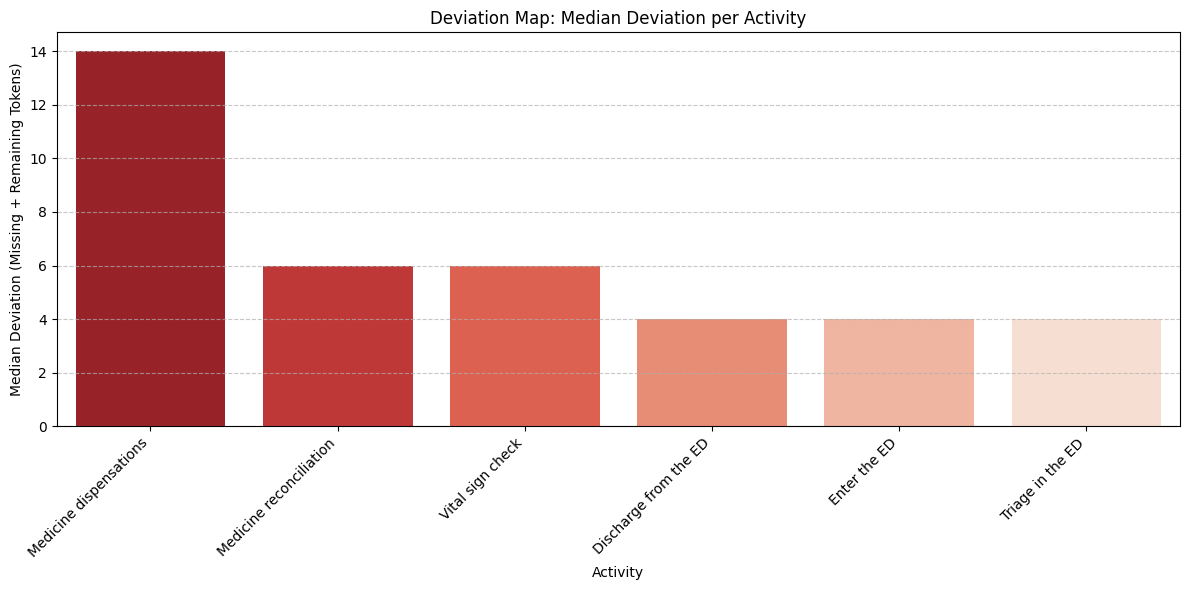


--- Top 6 Activities with Highest Median Deviation ---
concept:name
Medicine dispensations     14.0
Medicine reconciliation     6.0
Vital sign check            6.0
Discharge from the ED       4.0
Enter the ED                4.0
Triage in the ED            4.0
Name: deviation_score, dtype: float64


In [44]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

BEST_K = 9

representative_log = pm4py.filter_variants_top_k(
    clean_log,
    BEST_K,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:concept:name'
)

net_best_k, im_best_k, fm_best_k = pm4py.discover_petri_net_inductive(
    representative_log,
    activity_key='concept:name',
    case_id_key='case:concept:name',
    timestamp_key='time:timestamp'
)

replay_results = token_replay.apply(
    clean_log, net_best_k, im_best_k, fm_best_k,
    parameters={token_replay.Variants.TOKEN_REPLAY.value.Parameters.ACTIVITY_KEY: 'concept:name'}
)

replay_df = pd.DataFrame(replay_results)

replay_df['trace_is_fit'] = replay_df['trace_is_fit'].astype(int)  # 1=fit, 0=non-fit
replay_df['missing_tokens'] = replay_df['missing_tokens'].astype(int)
replay_df['remaining_tokens'] = replay_df['remaining_tokens'].astype(int)
# Total deviation = missing tokens (model too strict) + remaining tokens (log too strict)
replay_df['deviation_score'] = replay_df['missing_tokens'] + replay_df['remaining_tokens']

replay_df['case:concept:name'] = clean_log['case:concept:name'].unique()

grouped_case_deviation = replay_df.groupby('case:concept:name').agg({'deviation_score': 'sum'})
print("--- Top 10 Cases with Highest Deviation ---")
print(grouped_case_deviation.sort_values(by='deviation_score', ascending=False).head(10))


case_to_deviation = replay_df.set_index('case:concept:name')['deviation_score'].to_dict()
clean_log['deviation_score'] = clean_log['case:concept:name'].map(case_to_deviation)

activity_deviation = clean_log.groupby('concept:name')['deviation_score'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=activity_deviation.index,
    y=activity_deviation.values,
    palette="Reds_r"
)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Median Deviation (Missing + Remaining Tokens)")
plt.xlabel("Activity")
plt.title("Deviation Map: Median Deviation per Activity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

top_deviating_activities = activity_deviation.head(6)
print("\n--- Top 6 Activities with Highest Median Deviation ---")
print(top_deviating_activities)


In [44]:
replay_df

,trace_is_fit,trace_fitness,activated_transitions,reached_marking,enabled_transitions_in_marking,transitions_with_problems,missing_tokens,consumed_tokens,remaining_tokens,produced_tokens,deviation_score,case:concept:name
0,0,0.722222,"[(11187b75-78c2-4e4b-b445-2c8c52a81817, 'Enter...","{p_8: 5, sink: 1}","{(77e71df9-64f4-468a-a98f-3cdbe154b94e, 'Vital...","[(c7f03372-5fdb-494e-b408-6167fcc1b3f6, 'Medic...",5,18,5,18,10,30005370
1,0,0.489130,"[(11187b75-78c2-4e4b-b445-2c8c52a81817, 'Enter...","{p_13: 1, p_8: 11, sink: 1}","{(77e71df9-64f4-468a-a98f-3cdbe154b94e, 'Vital...","[(c7f03372-5fdb-494e-b408-6167fcc1b3f6, 'Medic...",11,22,12,23,23,30011087
2,0,0.913043,"[(11187b75-78c2-4e4b-b445-2c8c52a81817, 'Enter...","{p_8: 2, sink: 1}","{(77e71df9-64f4-468a-a98f-3cdbe154b94e, 'Vital...","[(c7f03372-5fdb-494e-b408-6167fcc1b3f6, 'Medic...",2,23,2,23,4,30016618
3,0,0.925926,"[(11187b75-78c2-4e4b-b445-2c8c52a81817, 'Enter...","{p_8: 2, sink: 1}","{(77e71df9-64f4-468a-a98f-3cdbe154b94e, 'Vital...","[(c7f03372-5fdb-494e-b408-6167fcc1b3f6, 'Medic...",2,27,2,27,4,30022872
4,1,1.000000,"[(11187b75-78c2-4e4b-b445-2c8c52a81817, 'Enter...",{sink: 1},{},[],0,15,0,15,0,30023012
...,...,...,...,...,...,...,...,...,...,...,...,...
1737,0,0.791667,"[(11187b75-78c2-4e4b-b445-2c8c52a81817, 'Enter...","{p_8: 5, sink: 1}","{(77e71df9-64f4-468a-a98f-3cdbe154b94e, 'Vital...","[(c7f03372-5fdb-494e-b408-6167fcc1b3f6, 'Medic...",5,24,5,24,10,39981700
1738,0,0.878788,"[(11187b75-78c2-4e4b-b445-2c8c52a81817, 'Enter...","{p_8: 4, sink: 1}","{(77e71df9-64f4-468a-a98f-3cdbe154b94e, 'Vital...","[(c7f03372-5fdb-494e-b408-6167fcc1b3f6, 'Medic...",4,33,4,33,8,39983716
1739,0,0.806452,"[(11187b75-78c2-4e4b-b445-2c8c52a81817, 'Enter...","{p_8: 6, sink: 1}","{(77e71df9-64f4-468a-a98f-3cdbe154b94e, 'Vital...","[(c7f03372-5fdb-494e-b408-6167fcc1b3f6, 'Medic...",6,31,6,31,12,39985021
1740,0,0.517241,"[(11187b75-78c2-4e4b-b445-2c8c52a81817, 'Enter...","{p_8: 14, sink: 1}","{(77e71df9-64f4-468a-a98f-3cdbe154b94e, 'Vital...","[(c7f03372-5fdb-494e-b408-6167fcc1b3f6, 'Medic...",14,29,14,29,28,39992492


In [45]:
num_fit = (replay_df['trace_is_fit'] == 1).sum()

print(f"Numero di trace fit: {num_fit}")
percent_fit = num_fit / len(replay_df) * 100
print(f"Percentuale di trace fit: {percent_fit:.2f}%")

Numero di trace fit: 633
Percentuale di trace fit: 36.34%


Top 10 cases with highest deviation:
                   deviation_score
case:concept:name                 
32978731                        88
38568954                        56
36704041                        54
35646691                        50
39604138                        48
34200940                        46
37771018                        42
39563255                        42
36155165                        40
33485812                        40


/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/4293489386.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


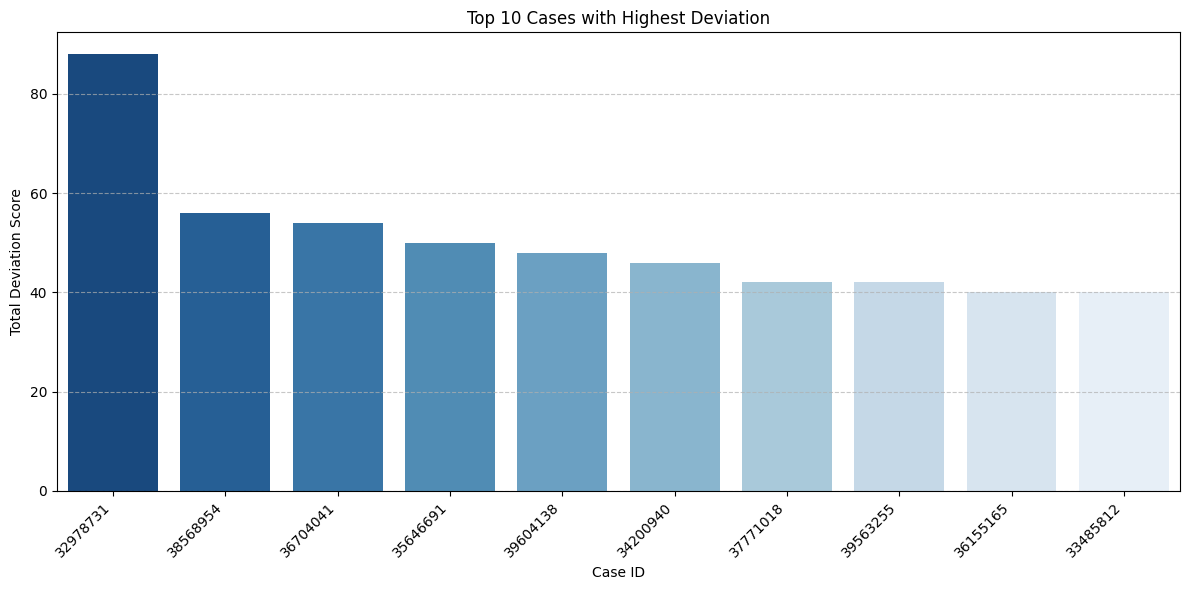

In [45]:
top_cases = grouped_case_deviation.sort_values(by='deviation_score', ascending=False).head(10)
print("Top 10 cases with highest deviation:")
print(top_cases)


plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_cases.index.astype(str),  
    y=top_cases['deviation_score'],
    palette="Blues_r"
)
plt.xticks(rotation=45, ha='right') 
plt.ylabel("Total Deviation Score")
plt.xlabel("Case ID")
plt.title("Top 10 Cases with Highest Deviation")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


--- Activity Sequences for Top 10 Deviating Cases ---

Case ID 32978731:
Enter the ED -> Triage in the ED -> Vital sign check -> Medicine dispensations -> Medicine dispensations -> Medicine dispensations -> Medicine dispensations -> Medicine dispensations -> Vital sign check -> Vital sign check -> Vital sign check -> Vital sign check -> Vital sign check -> Vital sign check -> Vital sign check -> Vital sign check -> Vital sign check -> Vital sign check -> Vital sign check -> Vital sign check -> Medicine reconciliation -> Medicine reconciliation -> Medicine reconciliation -> Medicine reconciliation -> Medicine reconciliation -> Medicine reconciliation -> Medicine reconciliation -> Medicine reconciliation -> Medicine reconciliation -> Medicine dispensations -> Medicine dispensations -> Medicine dispensations -> Medicine dispensations -> Medicine dispensations -> Medicine dispensations -> Medicine dispensations -> Medicine dispensations -> Vital sign check -> Medicine dispensations -> Med

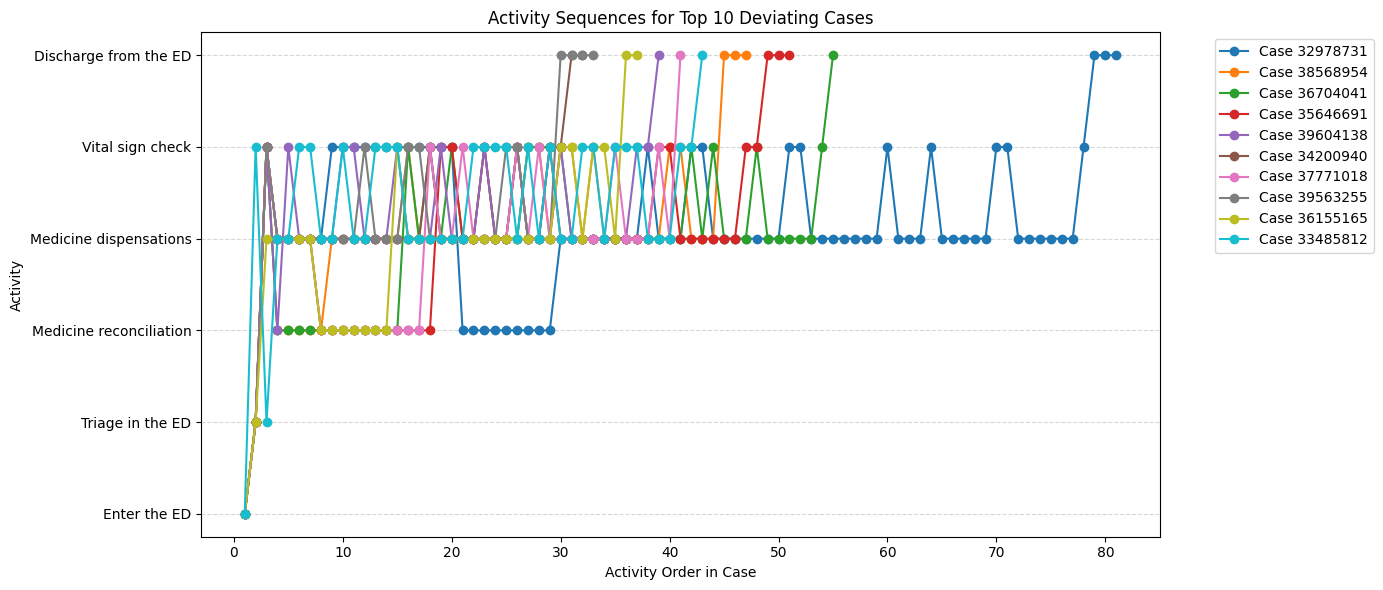

In [47]:
print("\n--- Activity Sequences for Top 10 Deviating Cases ---")
for case_id in top_cases.index:
    case_events = clean_log[clean_log['case:concept:name'] == case_id]
    activity_sequence = case_events['concept:name'].tolist()
    print(f"\nCase ID {case_id}:")
    print(" -> ".join(activity_sequence))


all_activities = clean_log['concept:name'].unique()
activity_to_num = {act: i for i, act in enumerate(all_activities)}

plt.figure(figsize=(14, 6))

for case_id in top_cases.index:
    case_events = clean_log[clean_log['case:concept:name'] == case_id]
    activity_sequence = case_events['concept:name'].tolist()
    y_values = [activity_to_num[act] for act in activity_sequence]
    x_values = list(range(1, len(y_values)+1))
    plt.plot(x_values, y_values, marker='o', label=f"Case {case_id}")

plt.yticks(ticks=list(activity_to_num.values()), labels=list(activity_to_num.keys()))
plt.xlabel("Activity Order in Case")
plt.ylabel("Activity")
plt.title("Activity Sequences for Top 10 Deviating Cases")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


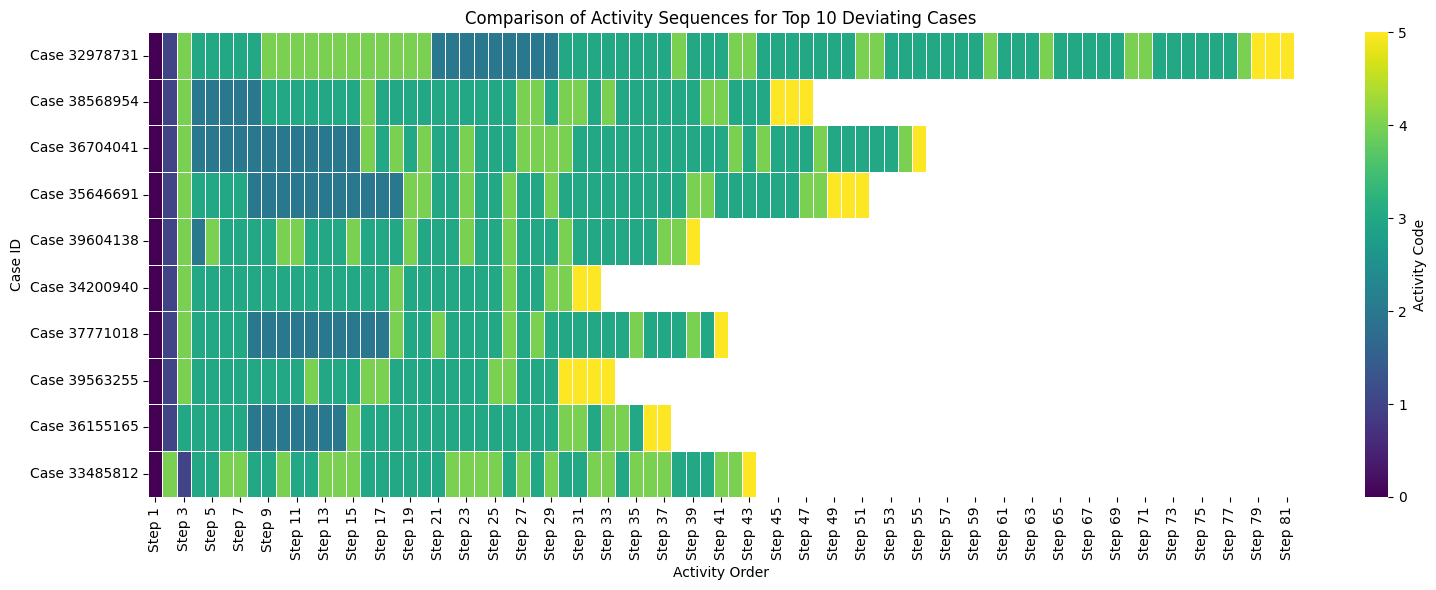

In [48]:
sequences = {}
max_len = 0

for case_id in top_cases.index:
    case_events = clean_log[clean_log['case:concept:name'] == case_id]
    seq = case_events['concept:name'].tolist()
    sequences[case_id] = seq
    max_len = max(max_len, len(seq))


all_activities = clean_log['concept:name'].unique()
activity_to_num = {act: i for i, act in enumerate(all_activities)}

matrix = []

for case_id, seq in sequences.items():
    encoded_seq = [activity_to_num[a] for a in seq]
    # padding with NaN to align lengths
    padded_seq = encoded_seq + [None] * (max_len - len(encoded_seq))
    matrix.append(padded_seq)

trace_df = pd.DataFrame(
    matrix,
    index=[f"Case {cid}" for cid in sequences.keys()],
    columns=[f"Step {i+1}" for i in range(max_len)]
)

plt.figure(figsize=(16, 6))
sns.heatmap(
    trace_df,
    cmap="viridis",
    cbar_kws={'label': 'Activity Code'},
    linewidths=0.5,
    linecolor='white'
)

plt.title("Comparison of Activity Sequences for Top 10 Deviating Cases")
plt.xlabel("Activity Order")
plt.ylabel("Case ID")
plt.tight_layout()
plt.show()


Case con più deviazione: 32978731
Frequenza delle attività nel case più deviato:
concept:name
Medicine dispensations     44
Vital sign check           23
Medicine reconciliation     9
Discharge from the ED       3
Enter the ED                1
Triage in the ED            1
Name: count, dtype: int64


/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/3313365297.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


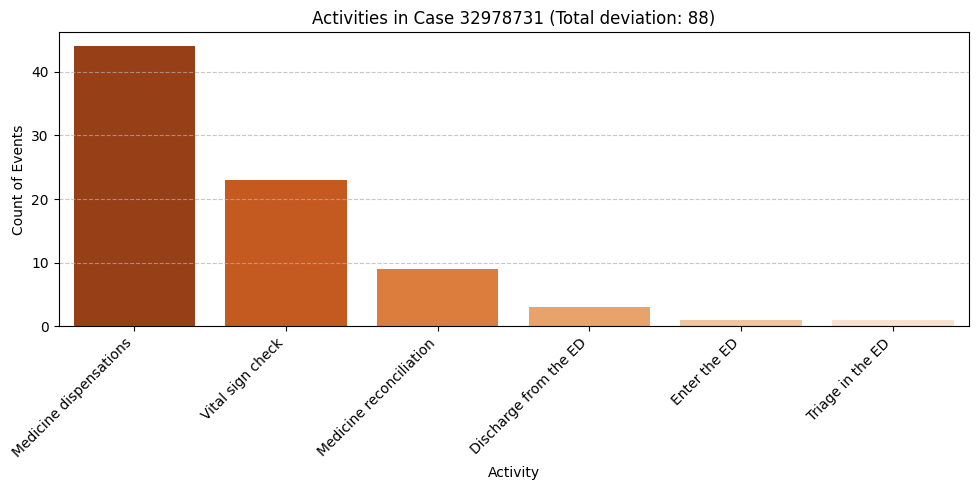

In [49]:

top_case_id = grouped_case_deviation['deviation_score'].idxmax()
print(f"Case con più deviazione: {top_case_id}")

case_events = clean_log[clean_log['case:concept:name'] == top_case_id]

trace_deviation = replay_df[replay_df['case:concept:name'] == top_case_id]['deviation_score'].values[0]

activity_counts = case_events['concept:name'].value_counts()
print("Frequenza delle attività nel case più deviato:")
print(activity_counts)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=activity_counts.index,
    y=activity_counts.values,
    palette="Oranges_r"
)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count of Events")
plt.xlabel("Activity")
plt.title(f"Activities in Case {top_case_id} (Total deviation: {trace_deviation})")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# pattern-based feature generation

In [50]:
if 'clean_log' not in locals():
    print("Error: 'clean_log' is not defined. Make sure you have run the previous cells.")

def extract_case_features(log_df):
    
    top5_diagnoses = log_df['diagnosis_code'].value_counts().head(5).index.tolist()
    
    case_df = log_df.groupby('case:concept:name').agg(
        # P1: High Acuity (Acuity 1 or 2) - use MIN because it represents acuity at admission
        P1_High_Acuity=('acuity', lambda x: 1 if (x.min() <= 2) else 0),
        
        # P2: Fever (Temperature >= 100.4 F) - use MAX
        # 100.4 F is the fever threshold (~38.0 C)
        P2_Has_Fever=('temperature', lambda x: 1 if (x.max() >= 100.4) else 0), 
        
        # P3: Urgent Transport (Ambulance or Helicopter) - use the FIRST event
        P3_Urgent_Transport=('arrival_transport', lambda x: 1 if x.iloc[0] in ['AMBULANCE', 'HELICOPTER'] else 0),
        
        # P4: Severe Pain (Pain >= 8) - use MAX
        P4_Severe_Pain=('pain', lambda x: 1 if (x.max() >= 8) else 0),
        
        # P5: Top 5 Diagnosis - use the FIRST event (diagnosis at admission)
        diagnosis_code=('diagnosis_code', 'first'),
        
        # Keep Lead Time for analysis
        LT_minutes=('LT_minutes', 'max')
    ).reset_index()

    # Apply P5 using the precomputed list
    case_df['P5_Top5_Diagnosis'] = case_df['diagnosis_code'].apply(
        lambda x: 1 if x in top5_diagnoses else 0
    )

    feature_cols = [
        'P1_High_Acuity', 
        'P2_Has_Fever', 
        'P3_Urgent_Transport', 
        'P4_Severe_Pain',
        'P5_Top5_Diagnosis'
    ]
    

    case_df['pattern_variant'] = case_df[feature_cols].astype(str).agg(''.join, axis=1)

    return case_df, feature_cols

case_features_df, feature_names = extract_case_features(clean_log)


pattern_variant_counts = case_features_df['pattern_variant'].value_counts()

print("=== Pattern-Based Variant Distribution (Top 10) ===")
print(pattern_variant_counts.head(10))

# Calculate average and median Lead Time (LT) for each new variant
pattern_variant_lt_stats = case_features_df.groupby('pattern_variant')['LT_minutes'].agg(
    num_cases='count',
    median_LT='median',
    mean_LT='mean'
).sort_values('median_LT', ascending=False)

print("\n=== Lead Time Statistics by Pattern-Based Variant (Top 10) ===")
print(pattern_variant_lt_stats.head(10))

# Extract the variant with the highest median Lead Time (critical)
critical_variant = pattern_variant_lt_stats.index[0]
critical_median_lt = pattern_variant_lt_stats['median_LT'][0]

print(f"\nCritical Variant (highest median LT): {critical_variant} (Median LT: {critical_median_lt:.2f} minutes)")

=== Pattern-Based Variant Distribution (Top 10) ===
pattern_variant
00000    541
10100    283
10000    210
00100    201
00010    180
00110     62
10110     61
10010     61
10001     21
10101     20
Name: count, dtype: int64

=== Lead Time Statistics by Pattern-Based Variant (Top 10) ===
                 num_cases   median_LT     mean_LT
pattern_variant                                   
11110                    4  631.458333  608.729167
10111                    3  522.000000  690.894444
10011                    6  504.500000  505.166667
10101                   20  475.000000  539.000000
11000                    8  470.000000  497.075000
10110                   61  460.000000  562.541257
10001                   21  423.000000  554.503968
11001                    1  417.000000  417.000000
00101                   17  405.000000  402.097059
11100                    8  395.141667  520.535417

Critical Variant (highest median LT): 11110 (Median LT: 631.46 minutes)


/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/1952013578.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  critical_median_lt = pattern_variant_lt_stats['median_LT'][0]


/var/folders/56/wb83zmqd5b993_2pwwcv29640000gn/T/ipykernel_29276/3753993369.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


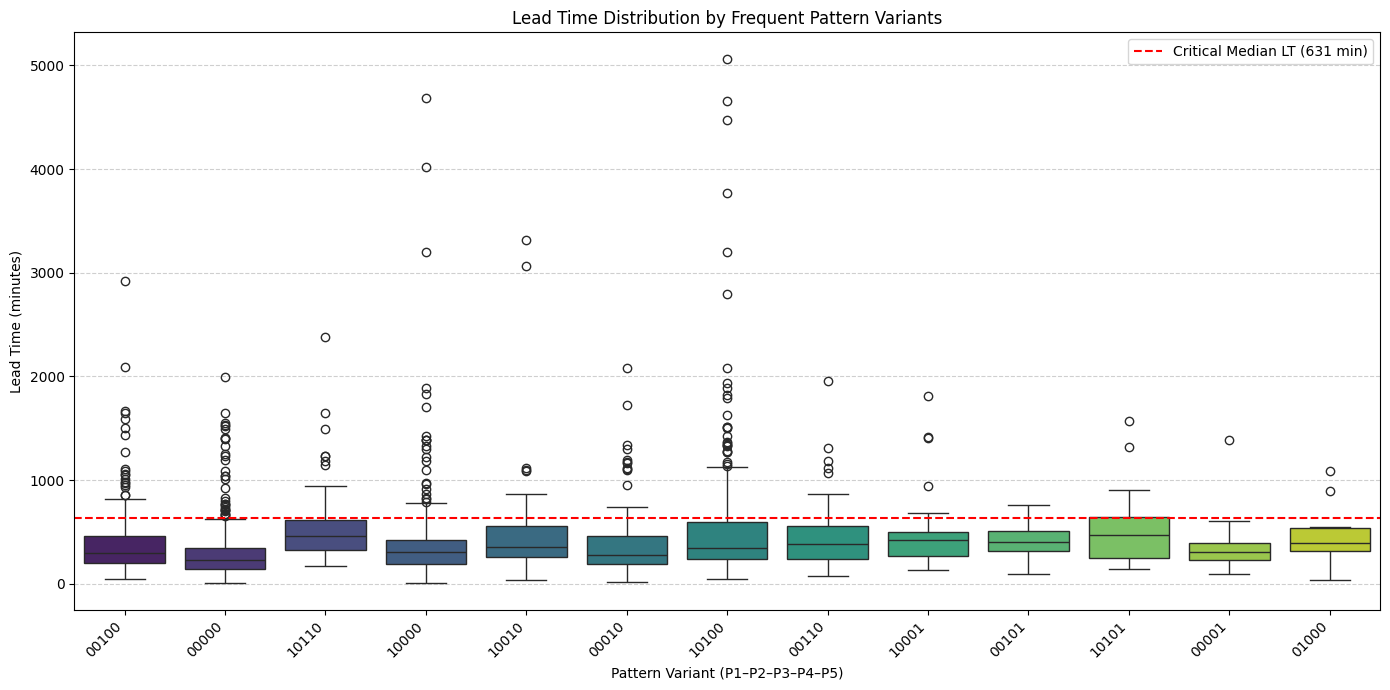

In [51]:

frequent_variants = pattern_variant_counts[pattern_variant_counts >= 10].index
plot_df = case_features_df[case_features_df['pattern_variant'].isin(frequent_variants)]

plt.figure(figsize=(14, 7))
sns.boxplot(
    data=plot_df,
    x='pattern_variant',
    y='LT_minutes',
    palette='viridis'
)

plt.title("Lead Time Distribution by Frequent Pattern Variants")
plt.xlabel("Pattern Variant (P1–P2–P3–P4–P5)")
plt.ylabel("Lead Time (minutes)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.axhline(
    critical_median_lt,
    color='red',
    linestyle='--',
    linewidth=1.5,
    label=f'Critical Median LT ({critical_median_lt:.0f} min)'
)

plt.legend()
plt.tight_layout()
plt.show()


In [52]:
print(clean_log.columns)

Index(['case:concept:name', 'time:timestamp', 'concept:name', 'gender', 'race',
       'arrival_transport', 'disposition', 'diagnosis_sequence',
       'diagnosis_code', 'diagnosis_description', 'temperature', 'heartrate',
       'resprate', 'o2sat', 'sbp', 'dbp', 'pain', 'acuity', 'chiefcomplaint',
       'rhythm', 'drug_name', 'generic_drug_code', 'national_drug_code',
       'reconciliation_nurse_id', 'drug_class_code',
       'drug_class_classification', 'administering_nurse_id', 'next_timestamp',
       'action_time_minutes', 'LT_minutes', 'first_timestamp',
       'incremental_LT_minutes', 'deviation_score'],
      dtype='object')


In [53]:
outcome_cols = ['ICU_admission', 'complications', 'mortality', 'total_cost', 'readmission_30d']

case_outcomes_df = clean_log.groupby('case:concept:name').agg(
    severe_events=('temperature', lambda x: (x >= 100.4).sum()),   
    high_pain_events=('pain', lambda x: (x >= 8).sum()),           
    num_drugs=('drug_name', 'nunique'),                            
    max_temp=('temperature', 'max'),
    max_pain=('pain', 'max'),
    median_LT=('LT_minutes', 'median')
).reset_index()

# Unisci le varianti con gli outcome derivati
case_analysis_df = case_features_df.merge(case_outcomes_df, on='case:concept:name')


variant_stats = case_analysis_df.groupby('pattern_variant').agg(
    num_cases=('case:concept:name', 'count'),
    median_LT=('median_LT', 'median'),
    mean_severe_events=('severe_events', 'mean'),
    mean_high_pain_events=('high_pain_events', 'mean'),
    mean_num_drugs=('num_drugs', 'mean'),
    max_temp=('max_temp', 'max'),
    max_pain=('max_pain', 'max')
).sort_values('median_LT', ascending=False)



print(variant_stats)


                 num_cases   median_LT  mean_severe_events  \
pattern_variant                                              
11110                    4  631.458333            1.500000   
10111                    3  522.000000            0.000000   
10011                    6  504.500000            0.000000   
10101                   20  475.000000            0.000000   
11000                    8  470.000000            1.375000   
10110                   61  460.000000            0.000000   
10001                   21  423.000000            0.000000   
11001                    1  417.000000            1.000000   
00101                   17  405.000000            0.000000   
11100                    8  395.141667            1.875000   
01000                   11  394.000000            1.454545   
00110                   62  382.500000            0.000000   
01100                    7  359.000000            1.571429   
11010                    5  359.000000            2.200000   
10010   